In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')


import os
from pathlib import Path
import re
from scipy.stats import linregress

In [2]:
df_dir = pd.read_csv("imdb_data1.csv", header=0)
df_star = pd.read_csv("imdb_data2.csv", header=0)

In [127]:
df = pd.merge(df_dir,df_star, on = 'Movie Name')

In [128]:
pd.set_option("Display.max_columns",None)
pd.set_option("Display.max_rows",None)

df.head()

S.no                                         Movie Name  Duration  Year  \
0     1                                    The Dark Knight       152  2008   
1     2      The Lord of the Rings: The Return of the King       201  2003   
2     3                Spider-Man: Across the Spider-Verse       140  2023   
3     4                                          Inception       148  2010   
4     5  The Lord of the Rings: The Fellowship of the Ring       178  2001   

   Ratings  Metascore           Director1          Director2  \
0      9.0       84.0   Christopher Nolan     Christian Bale   
1      9.0       94.0       Peter Jackson        Elijah Wood   
2      8.8       86.0  Joaquim Dos Santos        Kemp Powers   
3      8.8       74.0   Christopher Nolan  Leonardo DiCaprio   
4      8.8       92.0       Peter Jackson        Elijah Wood   

              Director3      Director4         Director5          Director6  \
0          Heath Ledger  Aaron Eckhart     Michael Caine                NaN   
1       Viggo Mortensen   Ian McKellen     Orlando Bloom                NaN   
2    Justin K. Thompson  Shameik Moore  Hailee Steinfeld  Brian Tyree Henry   
3  Joseph Gordon-Levitt    Elliot Page      Ken Watanabe                NaN   
4          Ian McKellen  Orlando Bloom         Sean Bean                NaN   

           Director7 Director8 Director9 Director10    Votes Gross collection  \
0                NaN       NaN       NaN        NaN  2759160      534,858,444   
1                NaN       NaN       NaN        NaN  1906339      377,845,905   
2  Luna Lauren Velez       NaN       NaN        NaN   208178           208178   
3                NaN       NaN       NaN        NaN  2449482      292,576,195   
4                NaN       NaN       NaN        NaN  1934546      315,544,750   

   Popularity Certification              Star1                 Star2  \
0         9.0            UA     Christian Bale          Heath Ledger   
1         9.0             U        Elijah Wood       Viggo Mortensen   
2         8.8             U        Kemp Powers    Justin K. Thompson   
3         8.8            UA  Leonardo DiCaprio  Joseph Gordon-Levitt   
4         8.8             U        Elijah Wood          Ian McKellen   

           Star3             Star4              Star5              Star6  \
0  Aaron Eckhart     Michael Caine                NaN                NaN   
1   Ian McKellen     Orlando Bloom                NaN                NaN   
2  Shameik Moore  Hailee Steinfeld  Brian Tyree Henry  Luna Lauren Velez   
3    Elliot Page      Ken Watanabe                NaN                NaN   
4  Orlando Bloom         Sean Bean                NaN                NaN   

  Star7 Star8 Star9     Genre1     Genre2     Genre3  
0   NaN   NaN   NaN     Action      Crime      Drama  
1   NaN   NaN   NaN     Action  Adventure      Drama  
2   NaN   NaN   NaN  Animation     Action  Adventure  
3   NaN   NaN   NaN     Action  Adventure     Sci-Fi  
4   NaN   NaN   NaN     Action  Adventure      Drama

# EDA

In [6]:
df.isnull().sum()

S.no                   0
Movie Name             0
Duration               0
Year                   0
Ratings                0
Metascore            193
Director1              0
Director2              0
Director3              1
Director4              1
Director5              2
Director6           1722
Director7           1824
Director8           1831
Director9           1833
Director10          1836
Votes                  0
Gross collection       0
Popularity             0
Certification         76
Star1                  0
Star2                  1
Star3                  1
Star4                  2
Star5               1722
Star6               1824
Star7               1831
Star8               1833
Star9               1836
Genre1                 0
Genre2                 2
Genre3               151
dtype: int64

In [129]:
df.shape

(1837, 32)

In [130]:
df.nunique()

S.no                1775
Movie Name          1744
Duration             119
Year                 112
Ratings               68
Metascore             86
Director1            943
Director2            778
Director3           1162
Director4           1338
Director5           1468
Director6            111
Director7             13
Director8              6
Director9              4
Director10             1
Votes               1768
Gross collection    1772
Popularity            68
Certification         22
Star1                778
Star2               1162
Star3               1338
Star4               1468
Star5                111
Star6                 13
Star7                  6
Star8                  4
Star9                  1
Genre1                 2
Genre2                14
Genre3                18
dtype: int64

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print("*"*75)

399     2
210     2
1178    2
600     2
1748    2
87      2
386     2
1616    2
1387    2
813     2
1760    2
606     2
1038    2
517     2
1487    2
1671    2
1488    2
843     2
1437    2
941     2
693     2
1392    2
979     2
1291    2
332     2
141     2
643     2
1729    2
575     2
1656    2
1615    2
1010    2
1090    2
1716    2
569     2
549     2
784     2
1607    2
370     2
1075    2
372     2
1668    2
170     2
1653    2
1430    2
917     2
637     2
921     2
680     2
436     2
1376    2
1242    2
1093    2
1573    2
259     2
652     2
1633    2
1196    2
934     2
1580    2
718     2
1151    2
1188    1
1187    1
1186    1
1138    1
1136    1
1185    1
1137    1
1189    1
1184    1
1183    1
1182    1
1135    1
1134    1
1190    1
1199    1
1126    1
1203    1
1202    1
1201    1
1200    1
1127    1
1128    1
1129    1
1130    1
1131    1
1191    1
1132    1
1198    1
1197    1
1195    1
1194    1
1193    1
1192    1
1133    1
1180    1
1181    1
1152    1
1139    1


In [10]:
df.columns

Index(['S.no', 'Movie Name', 'Duration', 'Year', 'Ratings', 'Metascore',
       'Director1', 'Director2', 'Director3', 'Director4', 'Director5',
       'Director6', 'Director7', 'Director8', 'Director9', 'Director10',
       'Votes', 'Gross collection', 'Popularity', 'Certification', 'Star1',
       'Star2', 'Star3', 'Star4', 'Star5', 'Star6', 'Star7', 'Star8', 'Star9',
       'Genre1', 'Genre2', 'Genre3'],
      dtype='object')

In [131]:
df.drop(['S.no'],axis=1,inplace=True)
df.shape

(1837, 31)

In [132]:
df.dtypes

Movie Name           object
Duration              int64
Year                 object
Ratings             float64
Metascore           float64
Director1            object
Director2            object
Director3            object
Director4            object
Director5            object
Director6            object
Director7            object
Director8            object
Director9            object
Director10           object
Votes                 int64
Gross collection     object
Popularity          float64
Certification        object
Star1                object
Star2                object
Star3                object
Star4                object
Star5                object
Star6                object
Star7                object
Star8                object
Star9                object
Genre1               object
Genre2               object
Genre3               object
dtype: object

In [133]:
df['Gross collection'] = df['Gross collection'].str.replace(',', '').astype(float)

In [134]:
df.dtypes

Movie Name           object
Duration              int64
Year                 object
Ratings             float64
Metascore           float64
Director1            object
Director2            object
Director3            object
Director4            object
Director5            object
Director6            object
Director7            object
Director8            object
Director9            object
Director10           object
Votes                 int64
Gross collection    float64
Popularity          float64
Certification        object
Star1                object
Star2                object
Star3                object
Star4                object
Star5                object
Star6                object
Star7                object
Star8                object
Star9                object
Genre1               object
Genre2               object
Genre3               object
dtype: object

# Univariate Analysis

<Axes: >

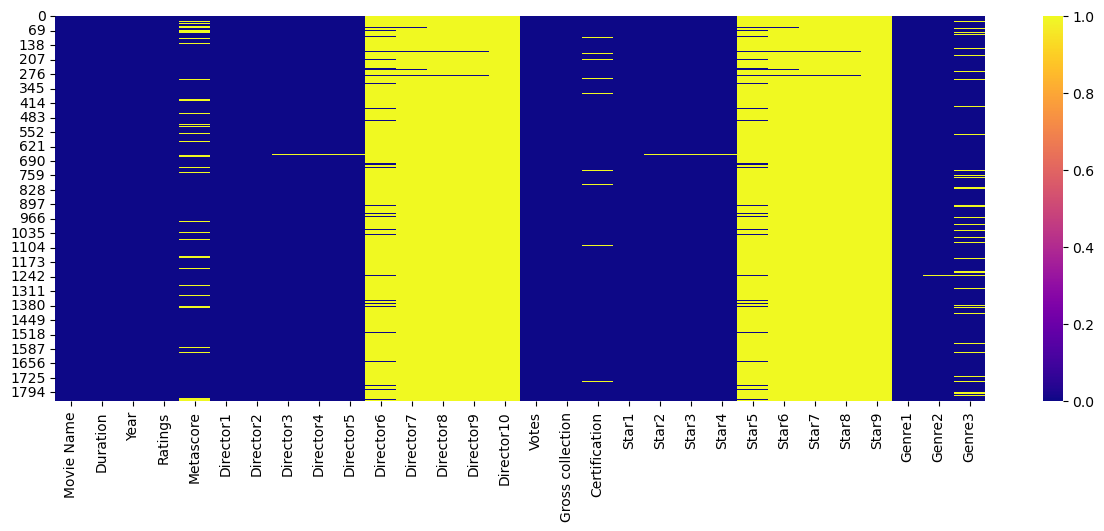

In [24]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='plasma')

Text(0.5, 0, 'IMDB Ratings')

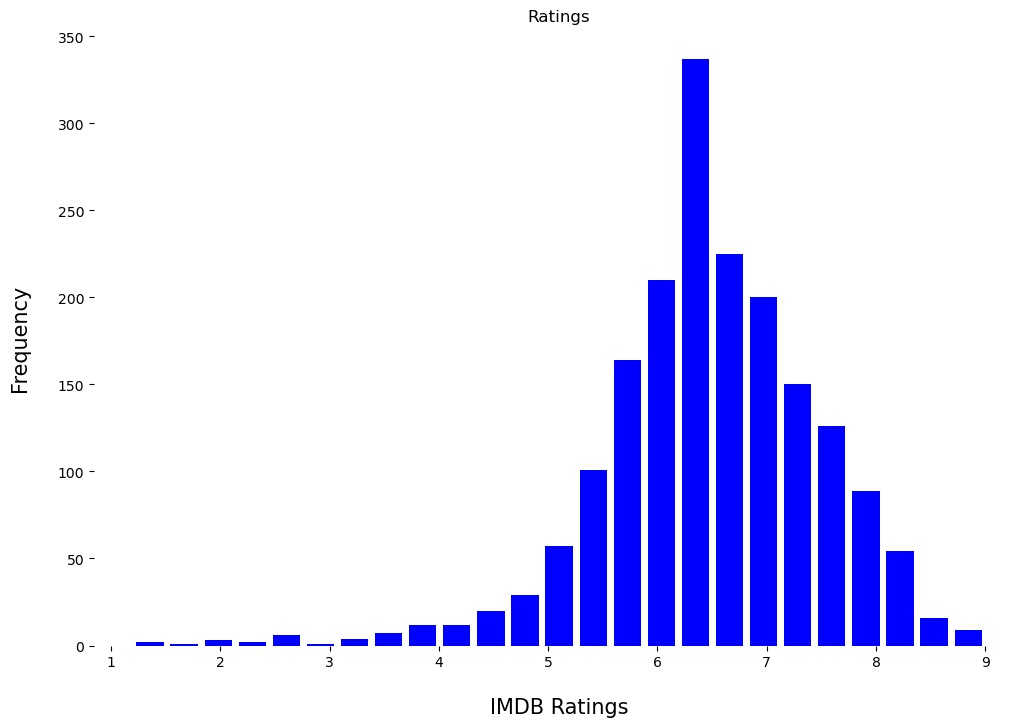

In [39]:
histplot = df.hist(column='Ratings', bins=25, grid=False, figsize=(12,8), color='blue',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('IMDB Ratings', size=15, labelpad=20)

The histogram shows most ratings fall between 5.5 and 7.5. High ratings (8 to 10) are rare.

Text(0.5, 0, 'IMDB Metascore')

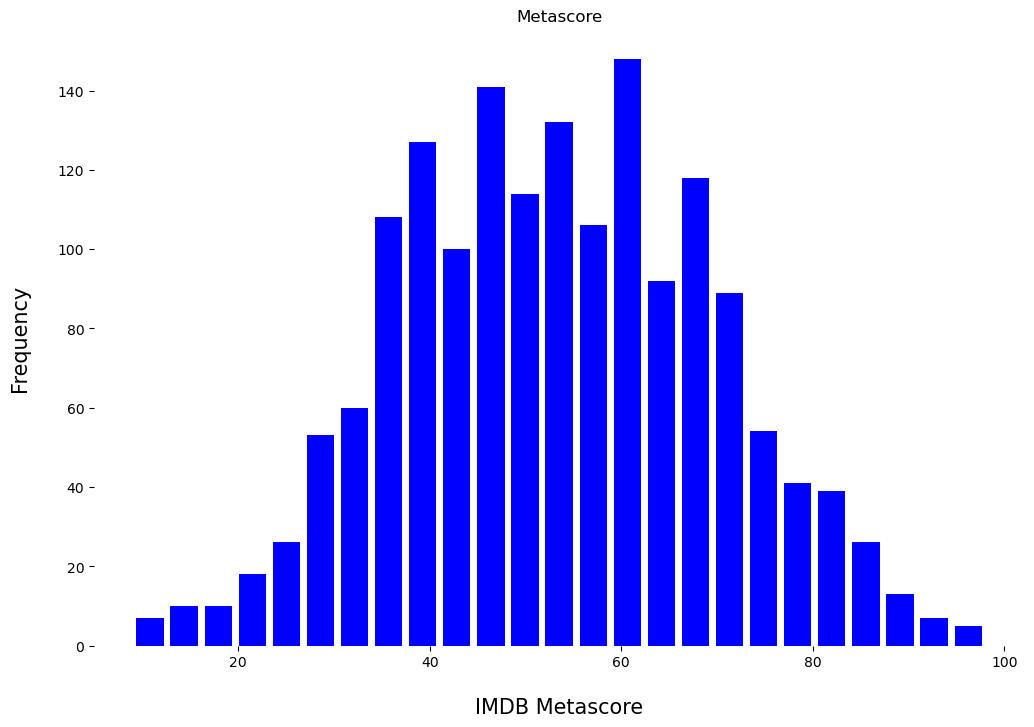

In [38]:
histplot = df.hist(column='Metascore', bins=25, grid=False, figsize=(12,8), color='blue', zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('IMDB Metascore', size=15, labelpad=20)

Text(0.5, 0, 'Movie Duration')

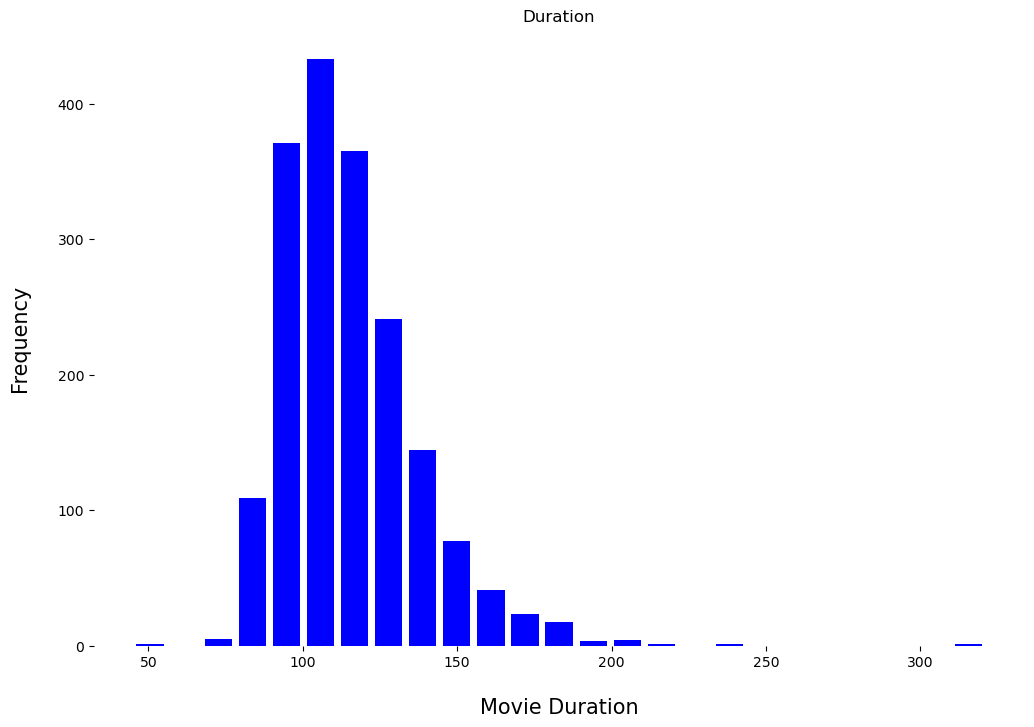

In [37]:
histplot = df.hist(column='Duration', bins=25, grid=False, figsize=(12,8), color='blue',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('Movie Duration', size=15, labelpad=20)

Text(0.5, 0, 'Movie Votes')

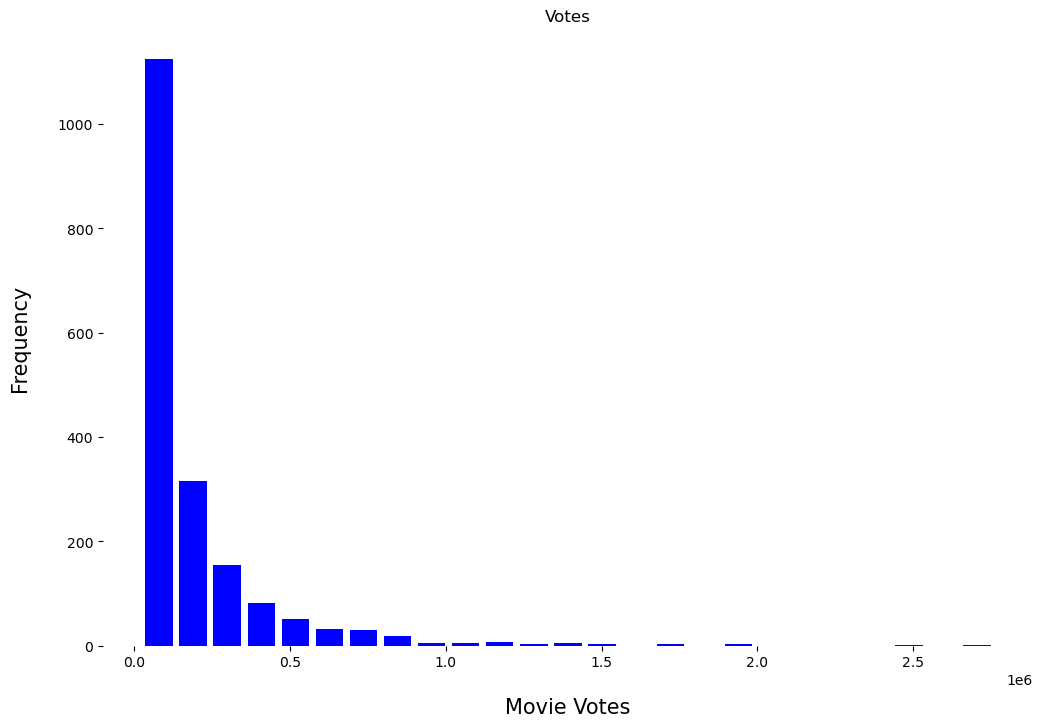

In [40]:
histplot = df.hist(column='Votes', bins=25, grid=False, figsize=(12,8), color='blue',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('Movie Votes', size=15, labelpad=20)

Text(0.5, 0, 'Movie Votes')

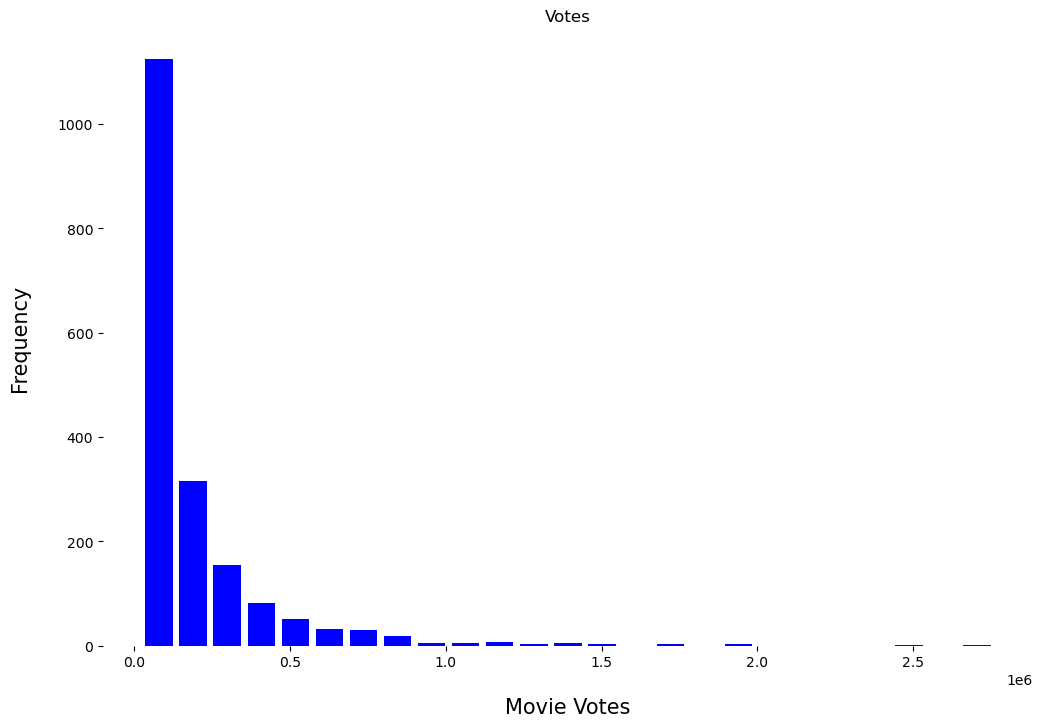

In [41]:
histplot = df.hist(column='Votes', bins=25, grid=False, figsize=(12,8), color='blue',
                   zorder=2, rwidth=0.8)

sns.despine(left=True, bottom=True)

plt.ylabel('Frequency', size=15, labelpad=20)
plt.xlabel('Movie Votes', size=15, labelpad=20)

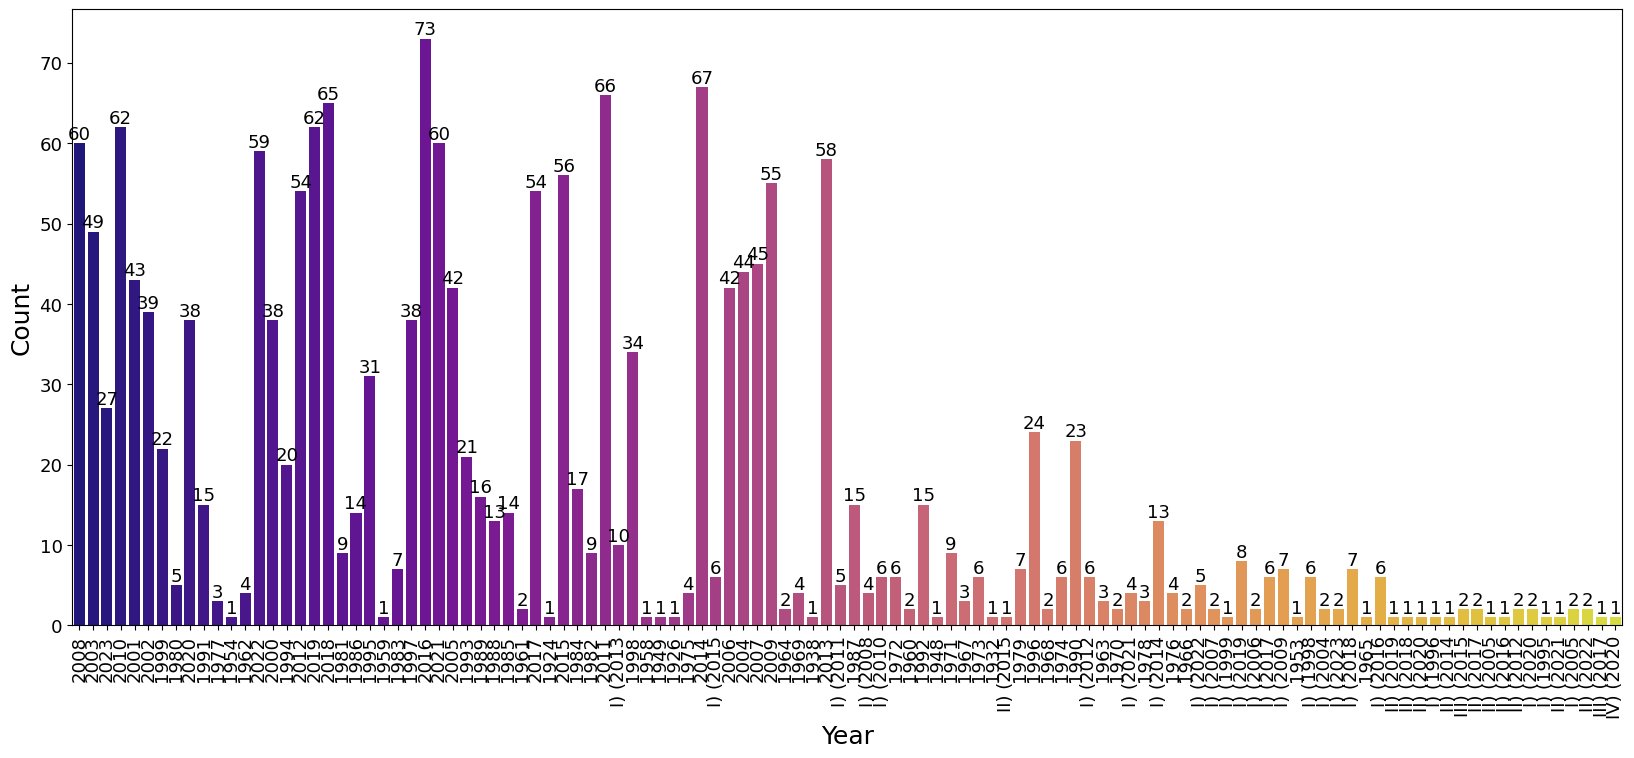

In [44]:
plt.figure(figsize=(20,8))
rx = sns.countplot(x=df['Year'],palette='plasma')
plt.xlabel('Year',fontsize=18)
plt.xticks(fontsize=13,rotation=90) 
plt.ylabel('Count',fontsize=18)
plt.yticks(fontsize=13)

for i in rx.containers:
    rx.bar_label(i,fontsize=13)
plt.show()

Above histplot for Year shows

1. Dataset contains movie's from the year 1924 to 2023 which is almost 100 years
2. Most of the movies release years are in between 2000 to 2022 and 2016 recorded maximum releases with 78 count

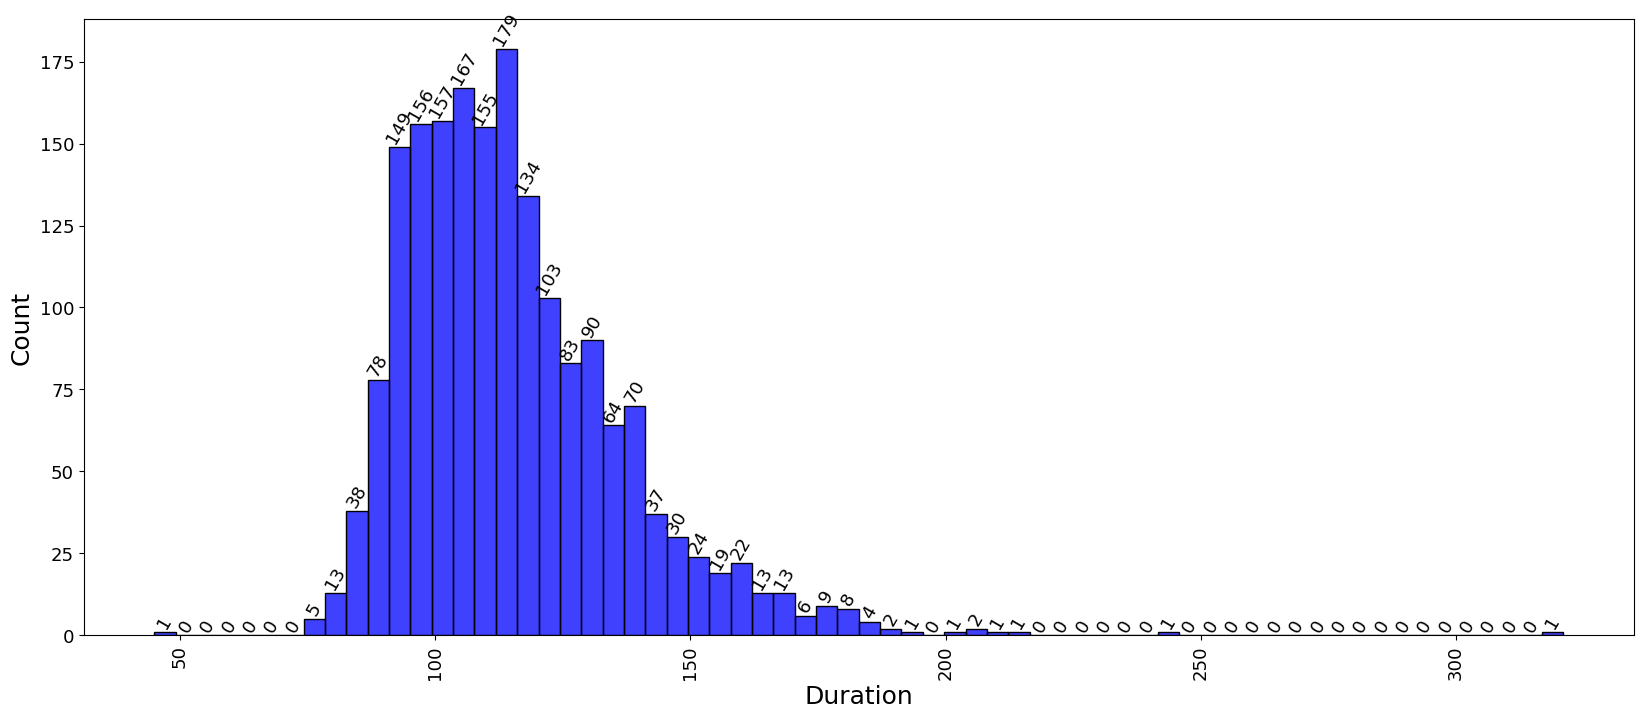

In [46]:
plt.figure(figsize=(20,8))
rx = sns.histplot(df['Duration'],color="blue")
plt.xlabel('Duration',fontsize=18)
plt.xticks(fontsize=13,rotation=90) 
plt.ylabel('Count',fontsize=18)
plt.yticks(fontsize=13)

for i in rx.containers:
    rx.bar_label(i,fontsize=13,rotation=60)
plt.show()

Based on above histplot, we can see that Duration of the movies are mostly between 90 mins to 135 mins

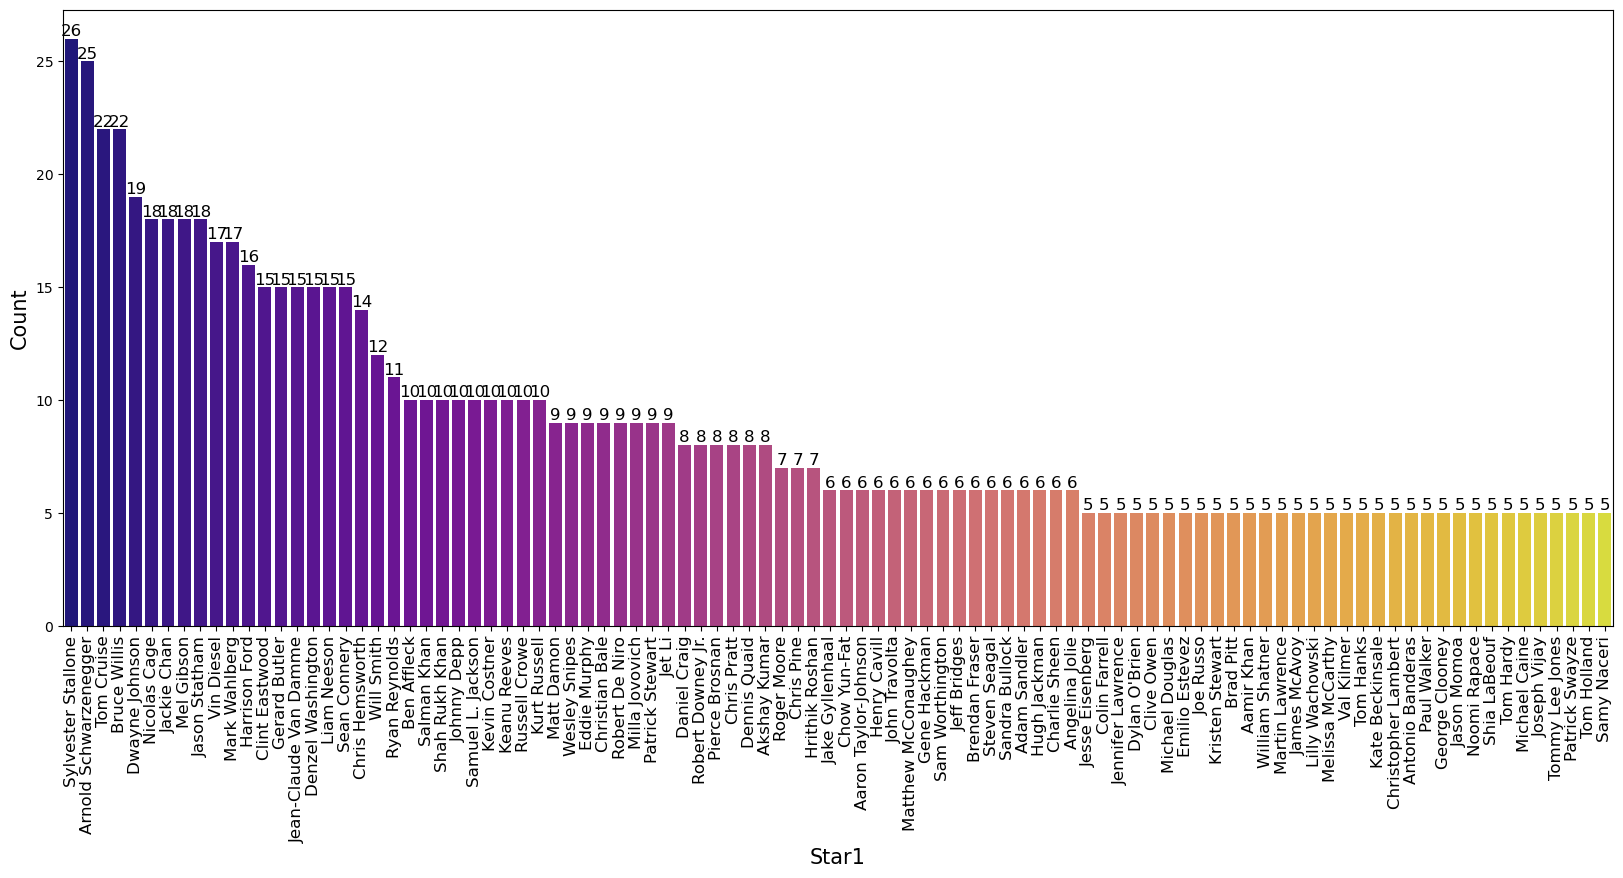

In [51]:
# Visualizing Star1 in countplot who have appeared in more than 5 movies
star1_counts = df['Star1'].value_counts()
Star1_above_5 = star1_counts[star1_counts >= 5]

plt.figure(figsize=(20,8))
rx = sns.countplot(data = df,x='Star1', order=Star1_above_5.index, palette='plasma')
plt.xlabel("Star1",fontsize=15)
plt.xticks(rotation = 90,fontsize=12) 
plt.ylabel('Count',fontsize=15)
for i in rx.containers:
    rx.bar_label(i,fontsize=12)
plt.show()

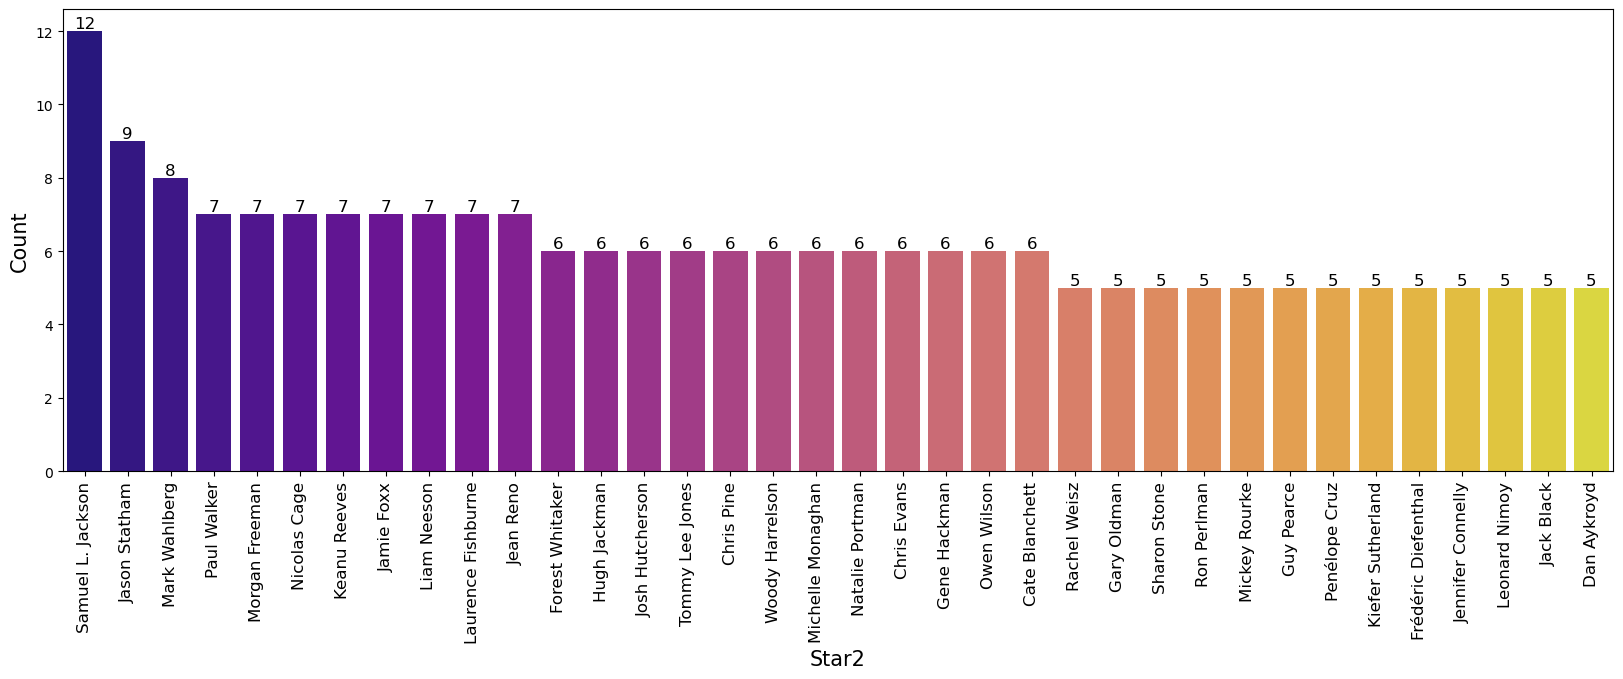

In [52]:
## Visualizing Star2 in countplot who have appeared in more than 5 movies
star2_counts = df['Star2'].value_counts()
Star2_above_5 = star2_counts[star2_counts >= 5]

plt.figure(figsize=(20,6))
rx = sns.countplot(data = df,x='Star2', order=Star2_above_5.index, palette='plasma')
plt.xlabel("Star2",fontsize=15)
plt.xticks(rotation = 90,fontsize=12) 
plt.ylabel('Count',fontsize=15)
for i in rx.containers:
    rx.bar_label(i,fontsize=12)
plt.show()

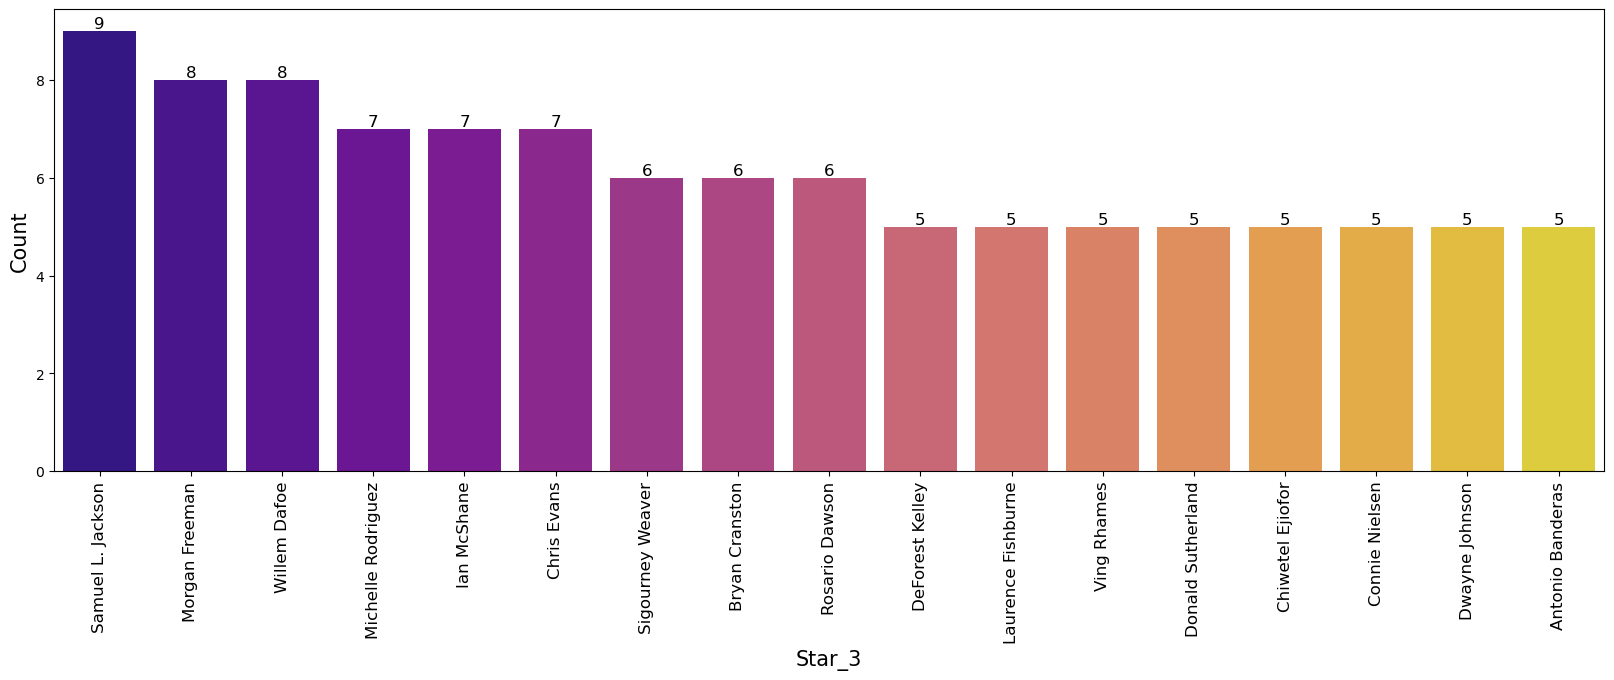

In [54]:
# Visualizing Star3 in countplot who have appeared in more than 5 movies

star3_counts = df['Star3'].value_counts()
star3_above_5 = star3_counts[star3_counts >= 5]

plt.figure(figsize=(20,6))
rx = sns.countplot(data = df,x='Star3', order=star3_above_5.index, palette='plasma')
plt.xlabel("Star_3",fontsize=15)
plt.xticks(rotation = 90,fontsize=12) 
plt.ylabel('Count',fontsize=15)
for i in rx.containers:
    rx.bar_label(i,fontsize=12)
plt.show()

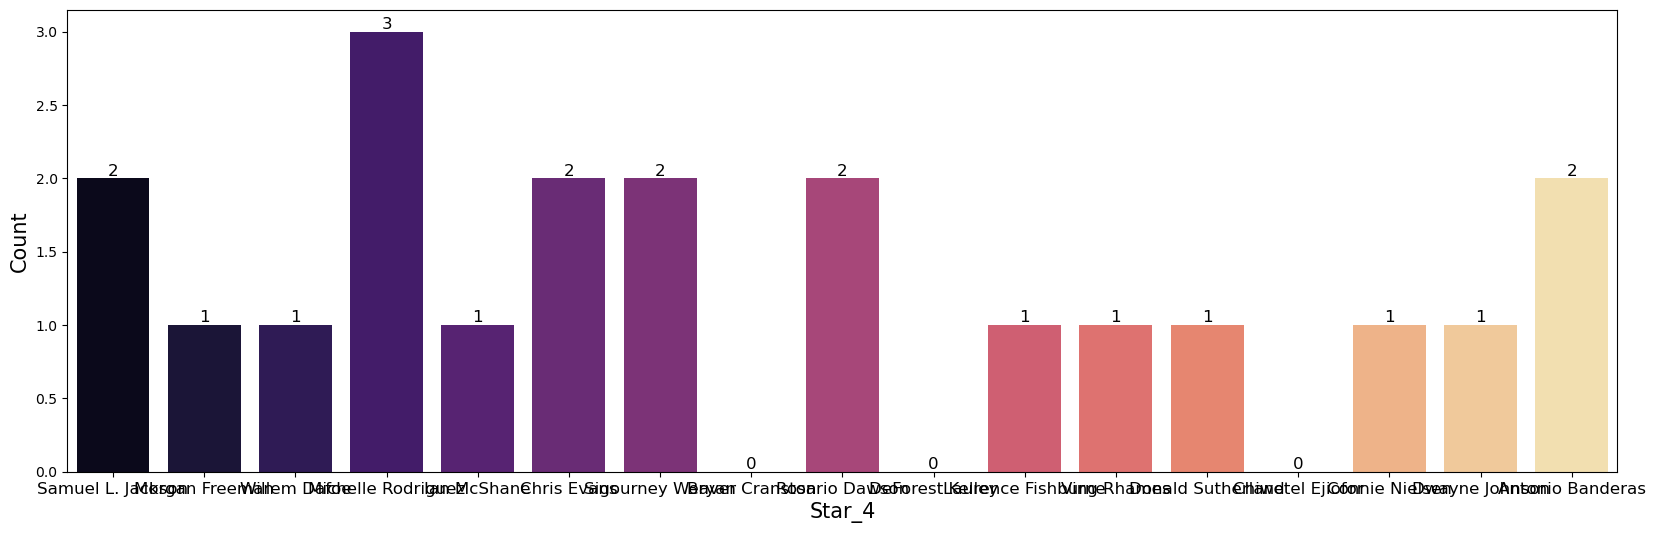

In [55]:
# Visualizing Star_4 in countplot who have appeared in more than 5 movies

star4_counts = df['Star4'].value_counts()
star4_above_5 = star4_counts[star4_counts >= 5]

plt.figure(figsize=(20,6))
rx = sns.countplot(data = df,x='Star4', order=star3_above_5.index, palette='magma')
plt.xlabel("Star_4",fontsize=15)
plt.xticks(fontsize=12) 
plt.ylabel('Count',fontsize=15)
for i in rx.containers:
    rx.bar_label(i,fontsize=12)
plt.show()

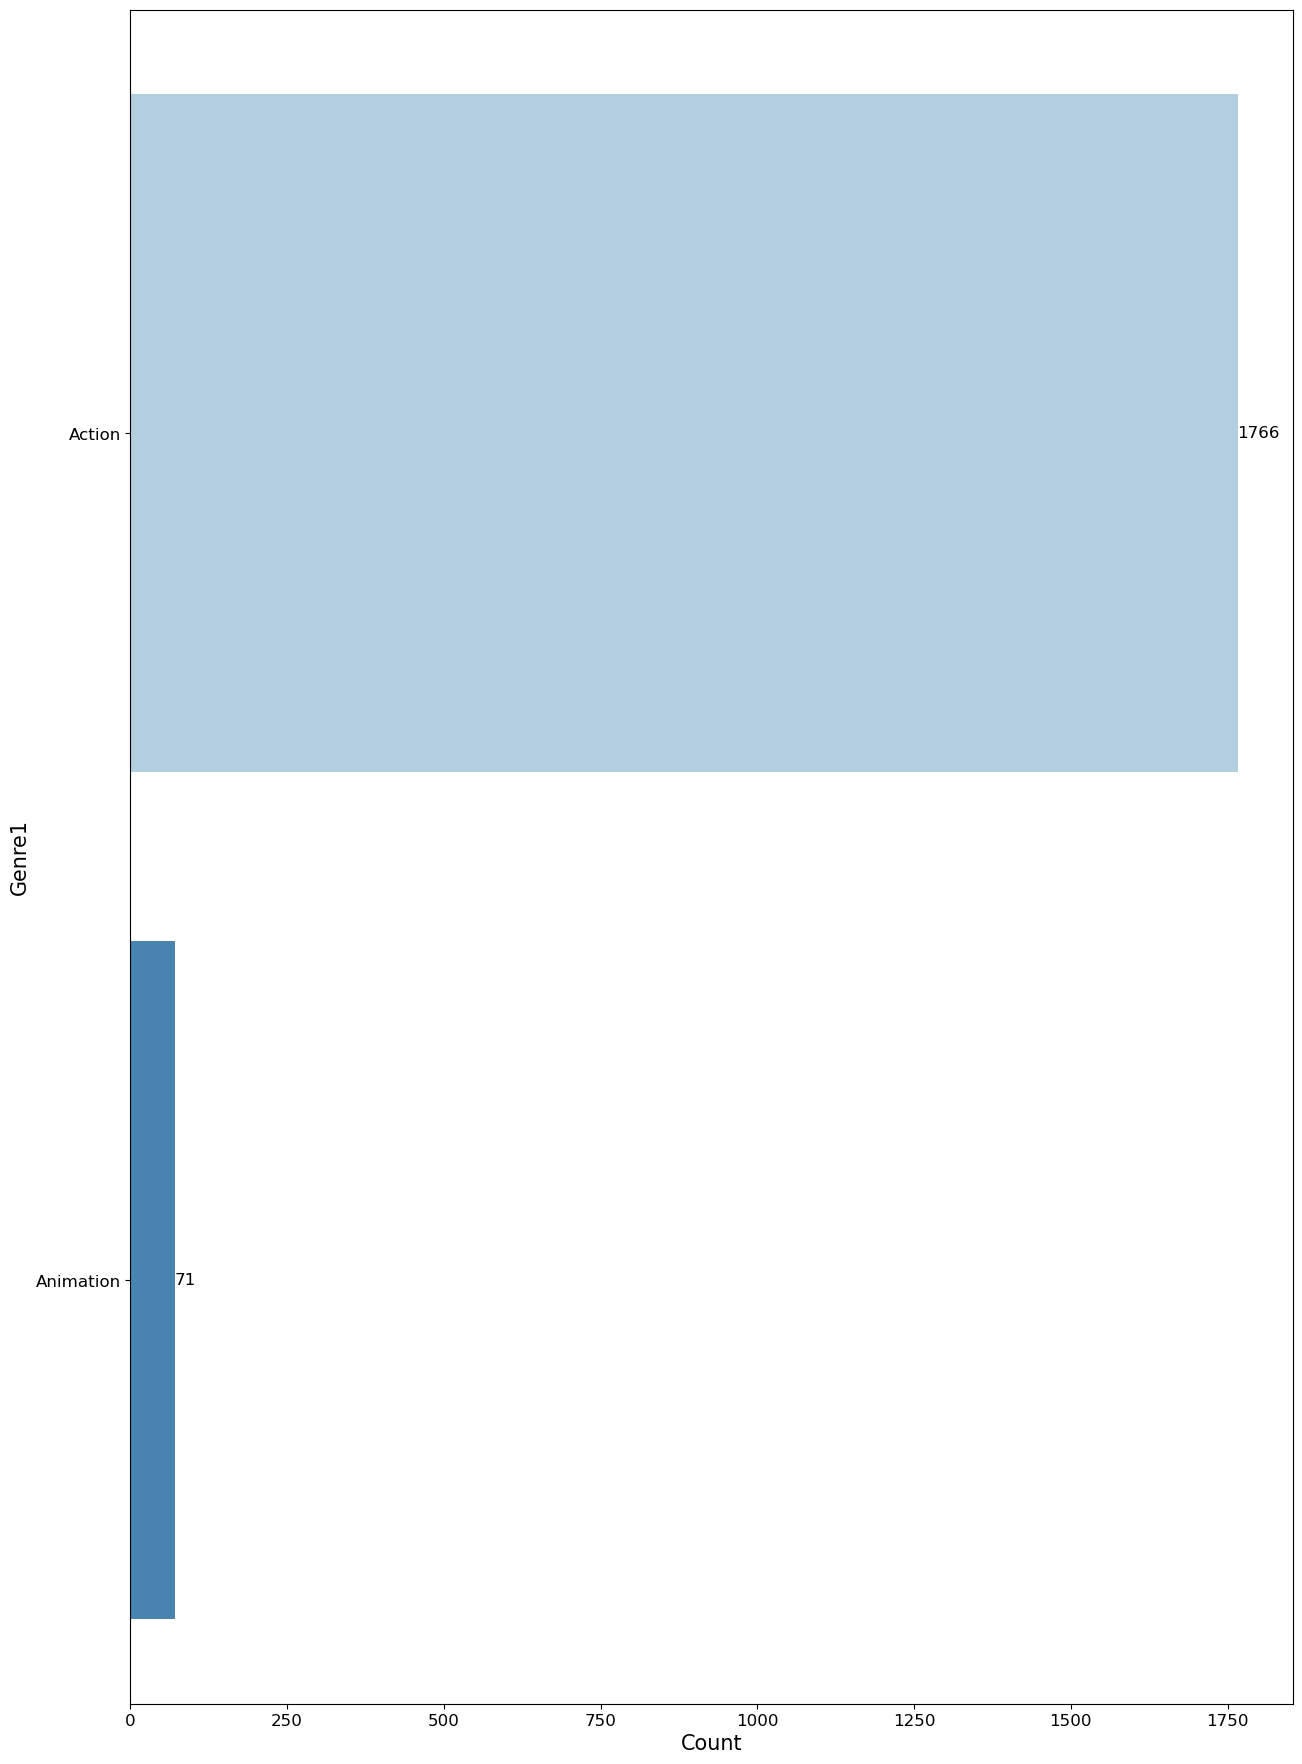

In [61]:
# Visualizing Genre1 in countplot

sort = df['Genre1'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(15,22))
rx = sns.countplot(data = df,y='Genre1',order = sort.index, palette='Blues')
plt.xlabel("Count",fontsize=15)
plt.ylabel("Genre1",fontsize=15)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

for i in rx.containers:
    rx.bar_label(i,fontsize=12)
plt.show()

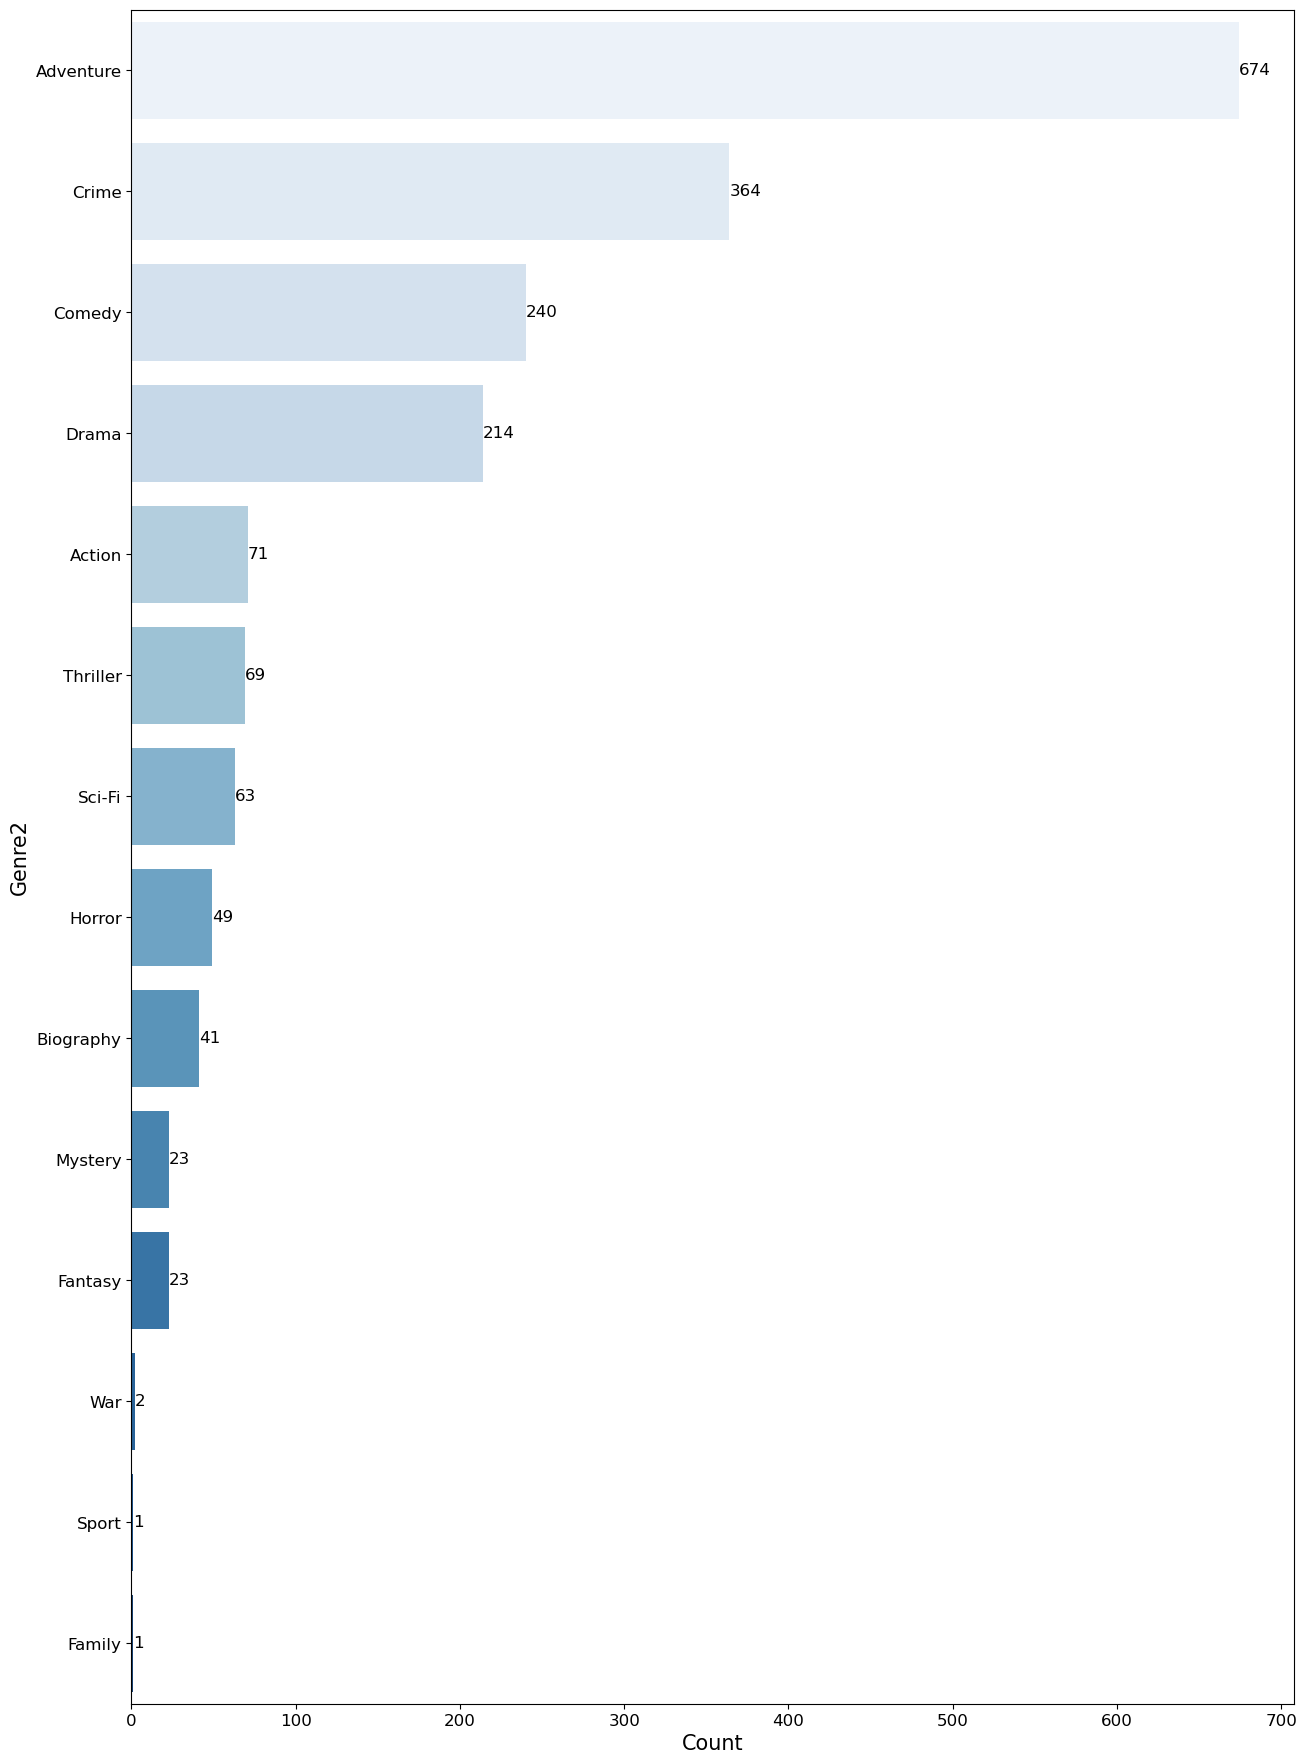

In [62]:
# Visualizing Genre2 in countplot

sort = df['Genre2'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(15,22))
rx = sns.countplot(data = df,y='Genre2',order = sort.index, palette='Blues')
plt.xlabel("Count",fontsize=15)
plt.ylabel("Genre2",fontsize=15)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

for i in rx.containers:
    rx.bar_label(i,fontsize=12)
plt.show()

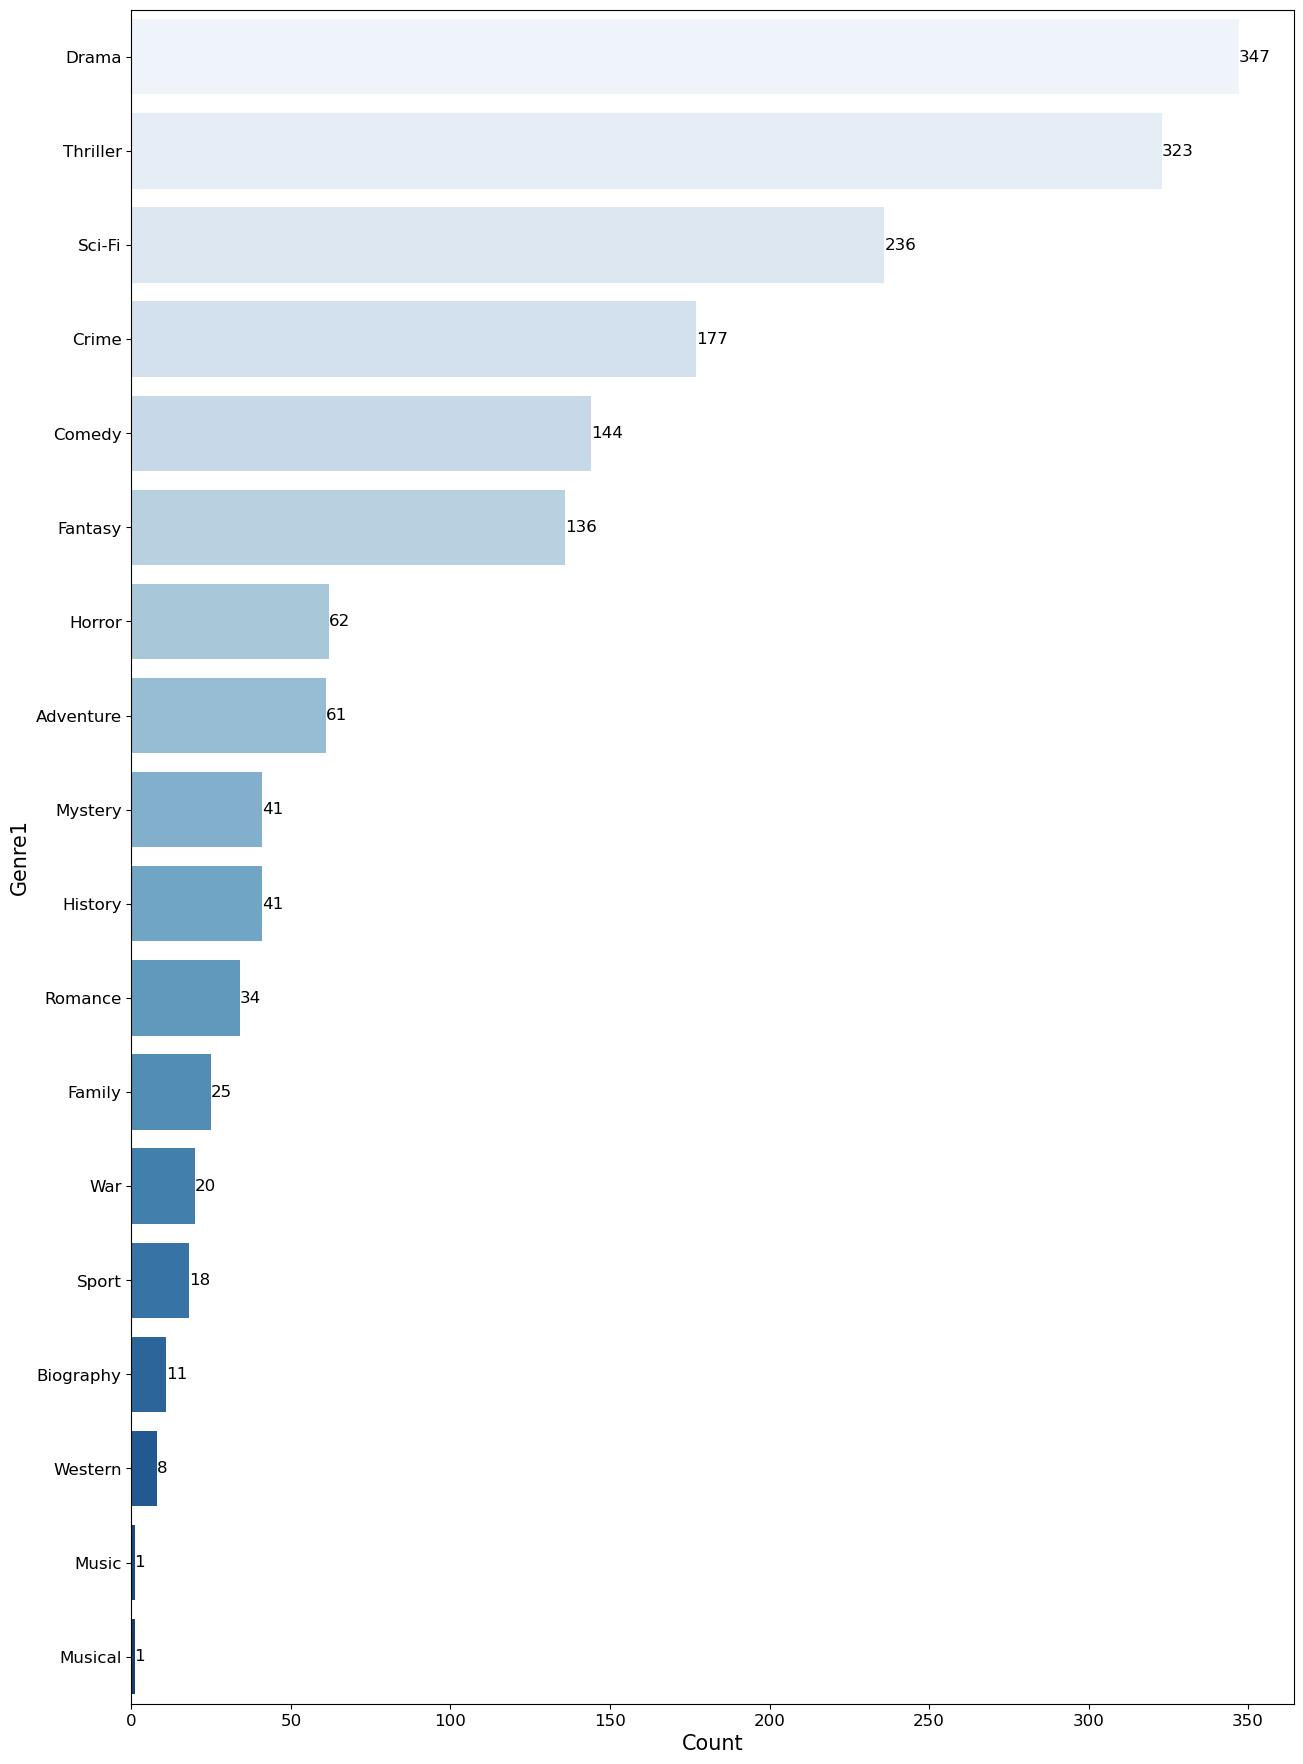

In [63]:
# Visualizing Genre3 in countplot

sort = df['Genre3'].value_counts().sort_values(ascending = False)

plt.figure(figsize=(15,22))
rx = sns.countplot(data = df,y='Genre3',order = sort.index, palette='Blues')
plt.xlabel("Count",fontsize=15)
plt.ylabel("Genre1",fontsize=15)
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

for i in rx.containers:
    rx.bar_label(i,fontsize=12)
plt.show()

Bivariate and Multivariate Analysis

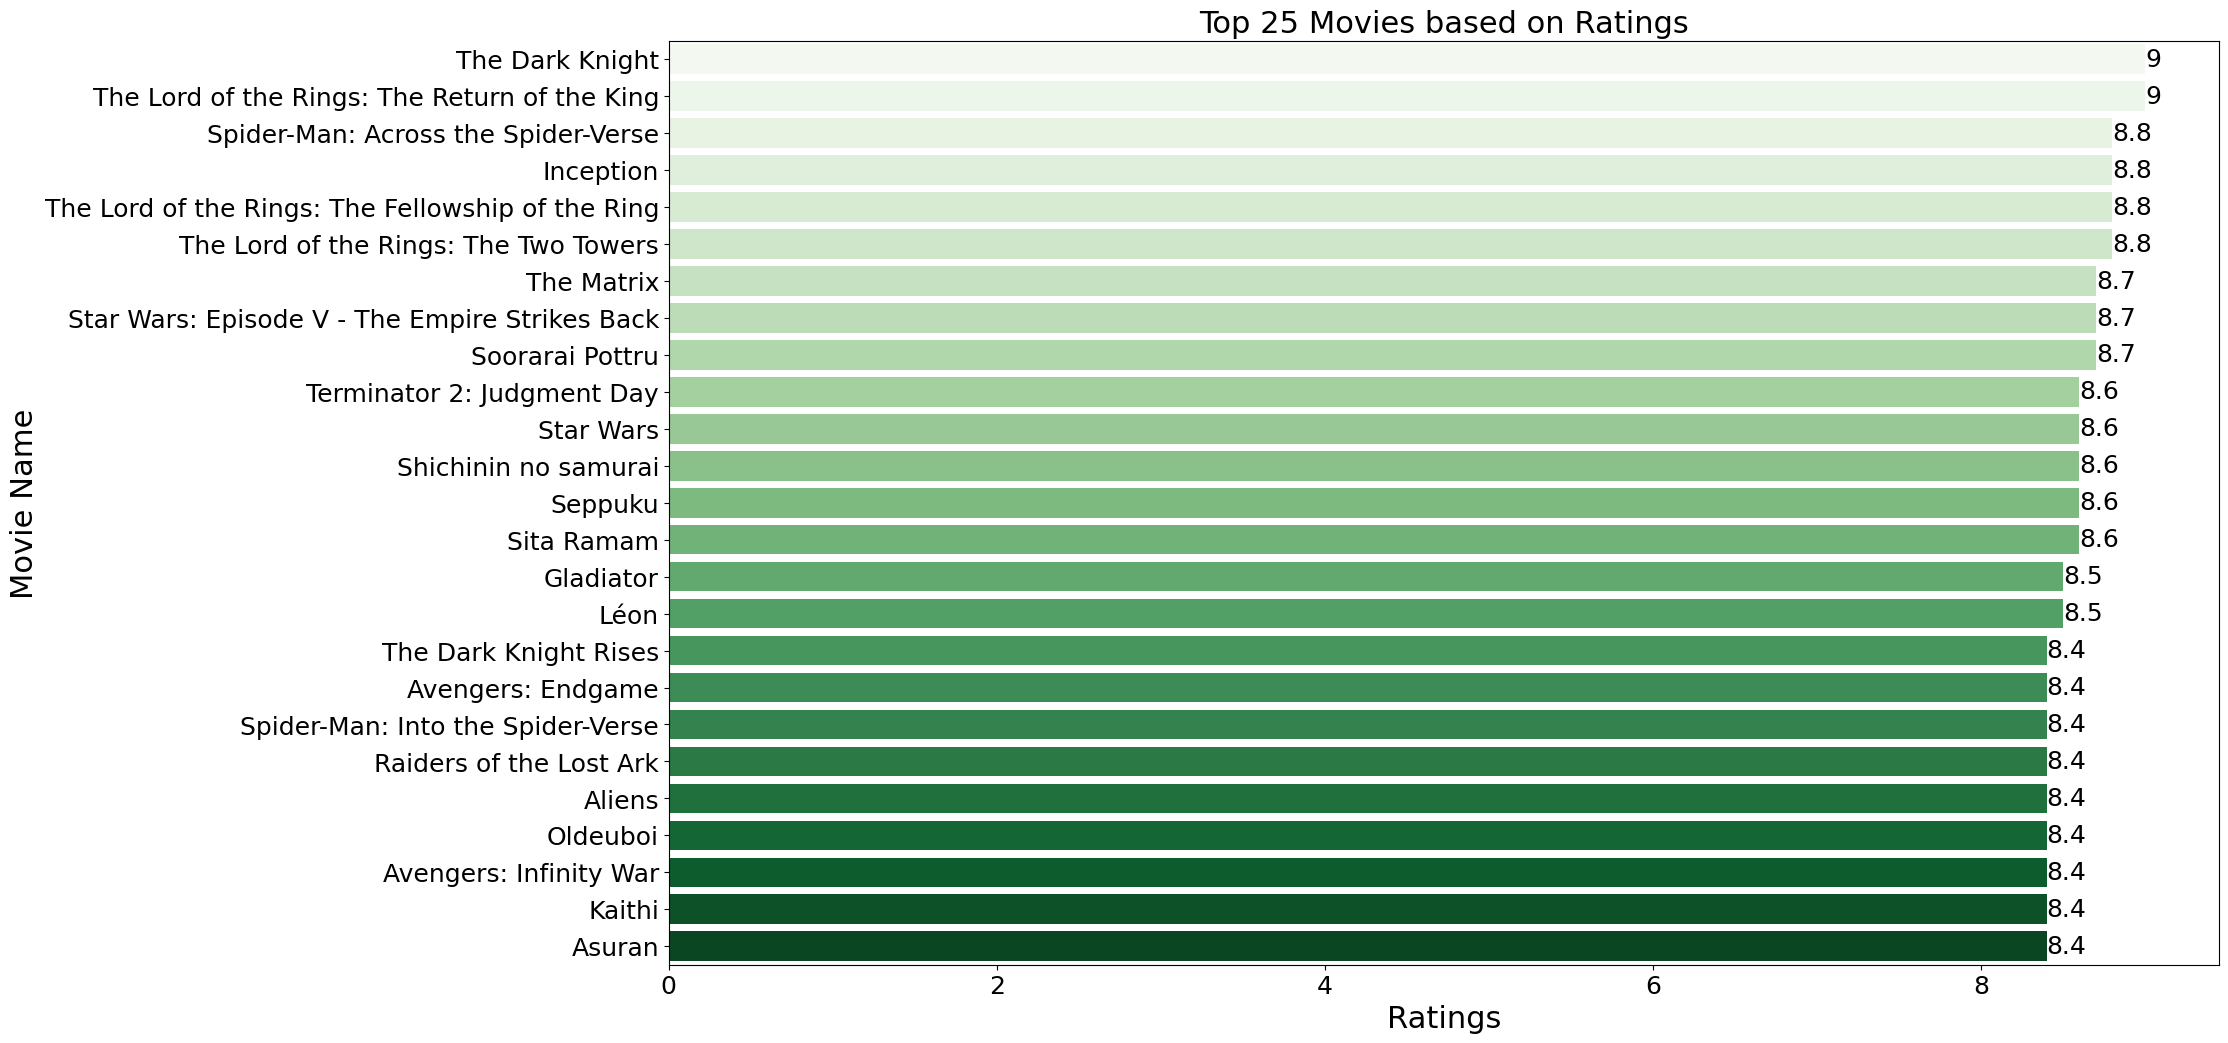

In [66]:
# Visualizing Top 25 Movies Vs Ratings in barplot

tx = df.nlargest(25, 'Ratings')

plt.figure(figsize=(20,12))
rx = sns.barplot(data=tx, y ='Movie Name', x ='Ratings', palette="Greens")
plt.xlabel('Ratings',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('Movie Name',fontsize=22)
plt.yticks(fontsize=18)
plt.title("Top 25 Movies based on Ratings",fontsize=22)

for i in rx.containers:
    rx.bar_label(i,fontsize=18)
    
plt.show()

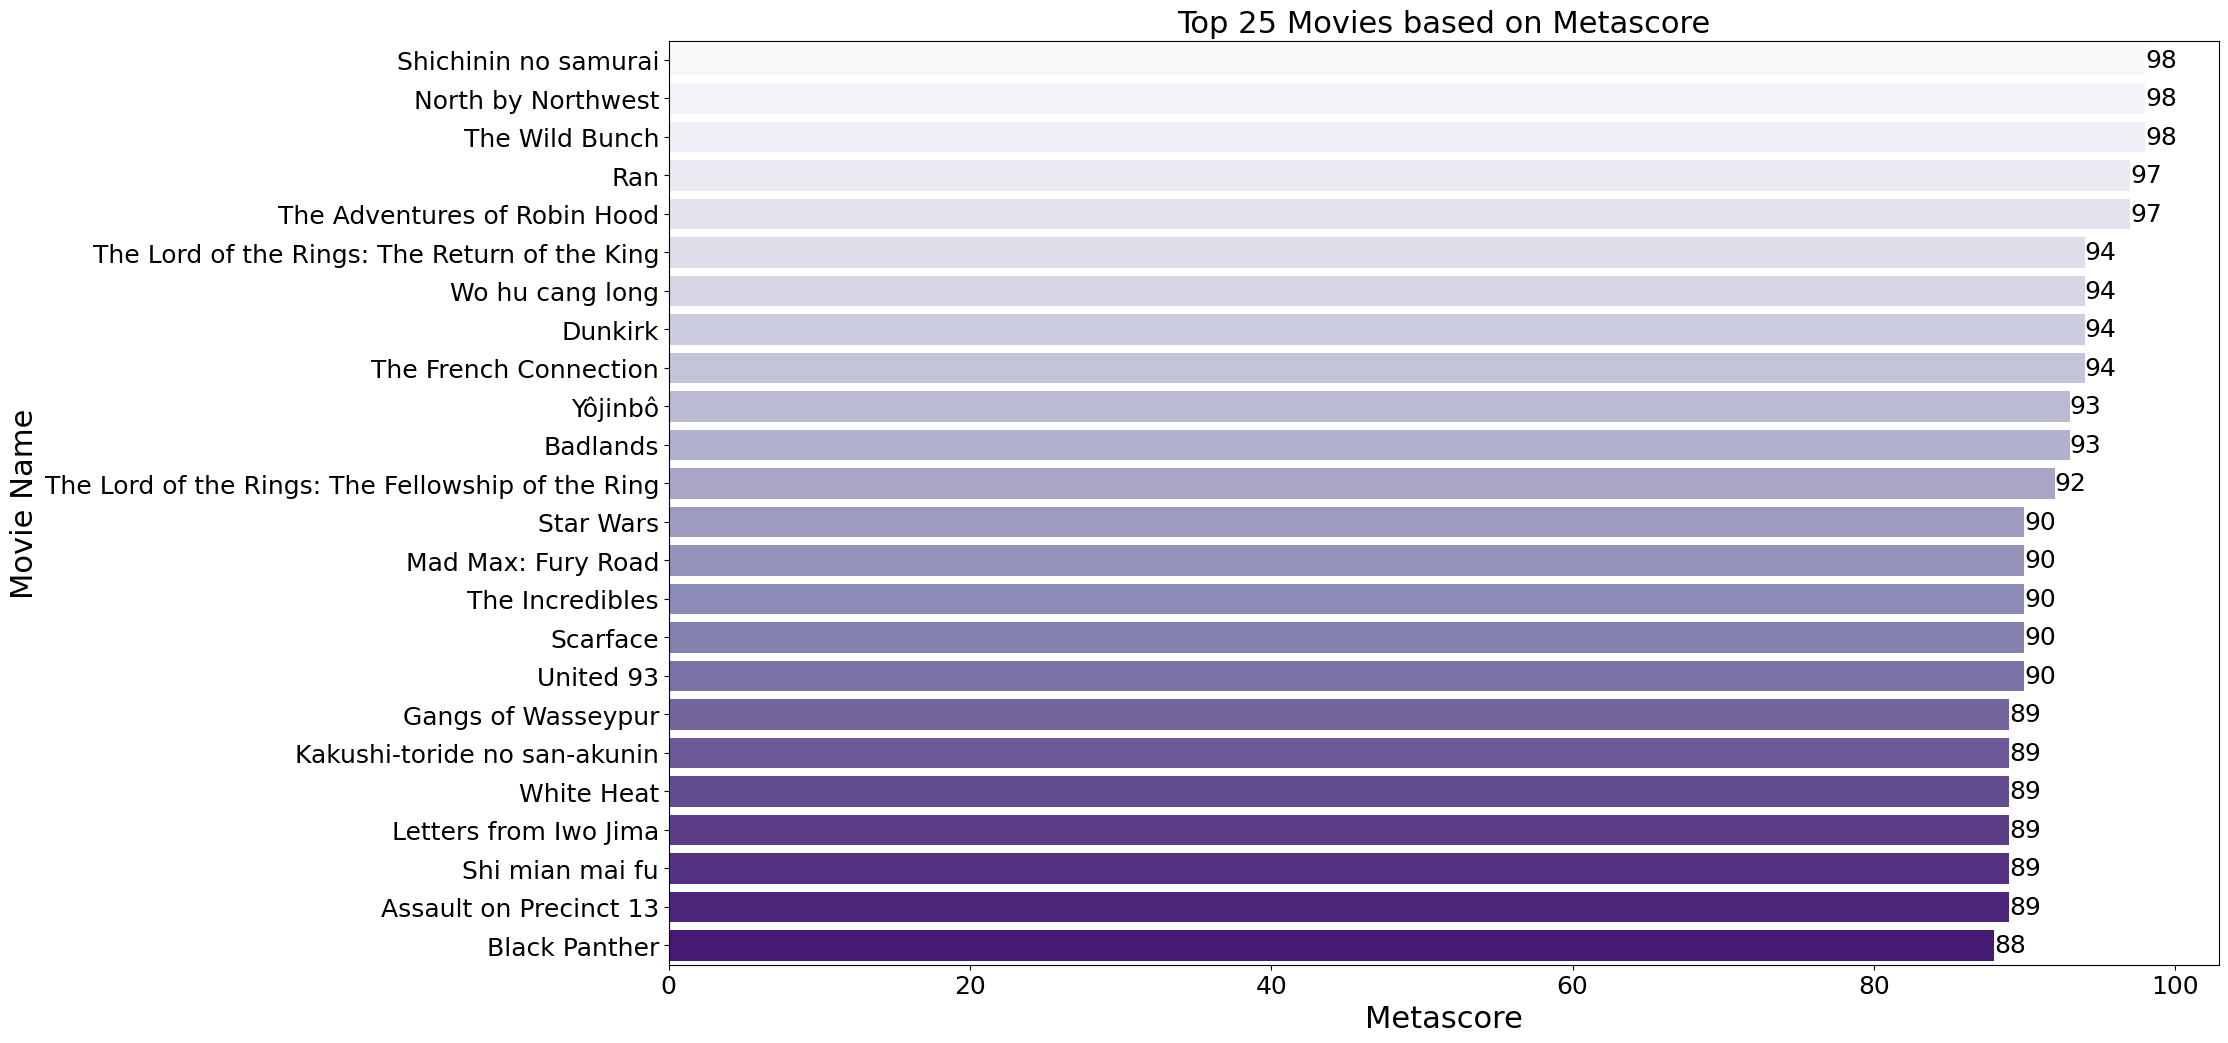

In [67]:
# Visualizing Top_25 Movie_Names Vs Metascore in barplot

tx = df.nlargest(25, 'Metascore')

plt.figure(figsize=(20,12))
rx = sns.barplot(data=tx, y ='Movie Name', x ='Metascore', palette="Purples")
plt.xlabel('Metascore',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('Movie Name',fontsize=22)
plt.yticks(fontsize=18)
plt.title("Top 25 Movies based on Metascore",fontsize=22)

for i in rx.containers:
    rx.bar_label(i,fontsize=18)
    
plt.show()

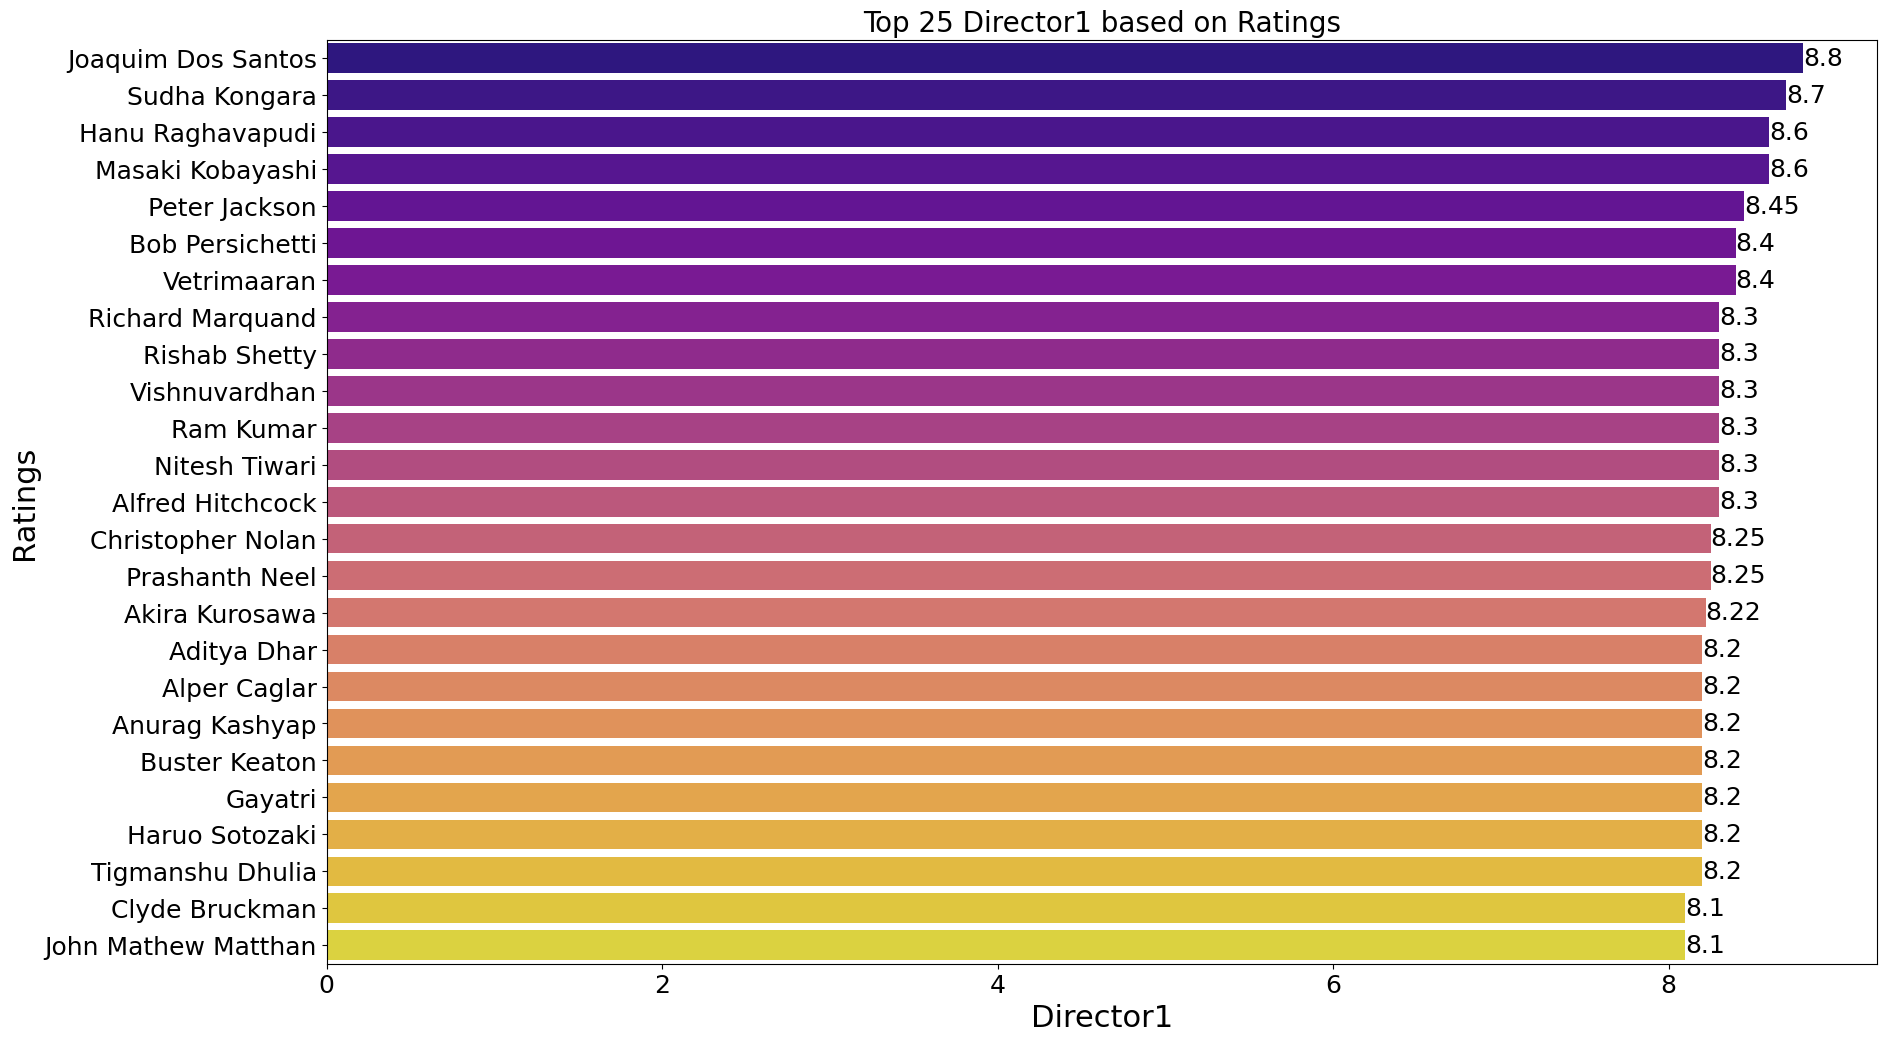

In [83]:
# Visualizing Top 25 Director1 Vs Ratings in barplot

tx = df.groupby('Director1')['Ratings'].mean().nlargest(25)
df_top_25 = tx.sort_values(ascending=False)

plt.figure(figsize=(20,12))
rx = sns.barplot(data=df_top_25.reset_index(), y ='Director1', x ='Ratings', palette="plasma")
plt.xlabel('Director1',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('Ratings',fontsize=22)
plt.yticks(fontsize=18)
plt.title("Top 25 Director1 based on Ratings",fontsize=20)

for i in rx.containers:
    rx.bar_label(i,fontsize=18)
    
plt.show()

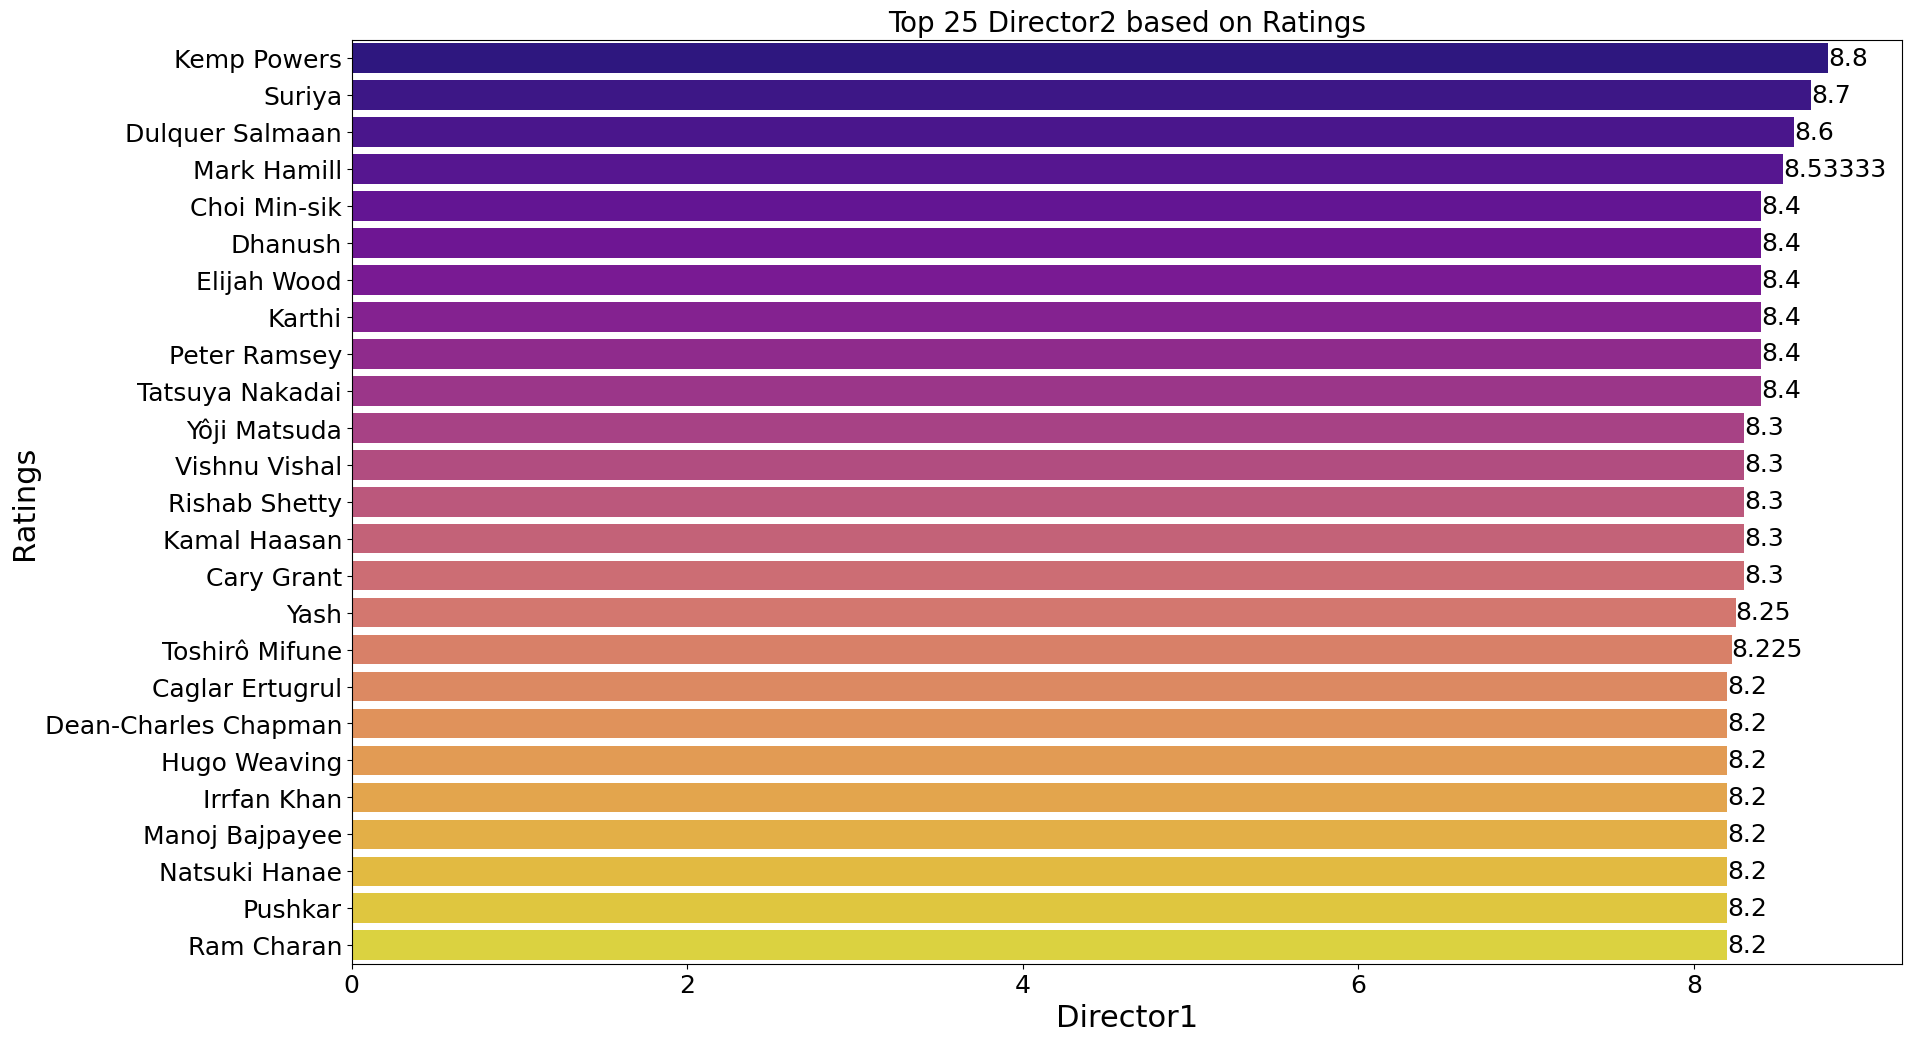

In [82]:
# Visualizing Top 25 Director2 Vs Ratings in barplot

tx = df.groupby('Director2')['Ratings'].mean().nlargest(25)
df_top_25 = tx.sort_values(ascending=False)

plt.figure(figsize=(20,12))
rx = sns.barplot(data=df_top_25.reset_index(), y ='Director2', x ='Ratings', palette="plasma")
plt.xlabel('Director1',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('Ratings',fontsize=22)
plt.yticks(fontsize=18)
plt.title("Top 25 Director2 based on Ratings",fontsize=20)

for i in rx.containers:
    rx.bar_label(i,fontsize=18)
    
plt.show()

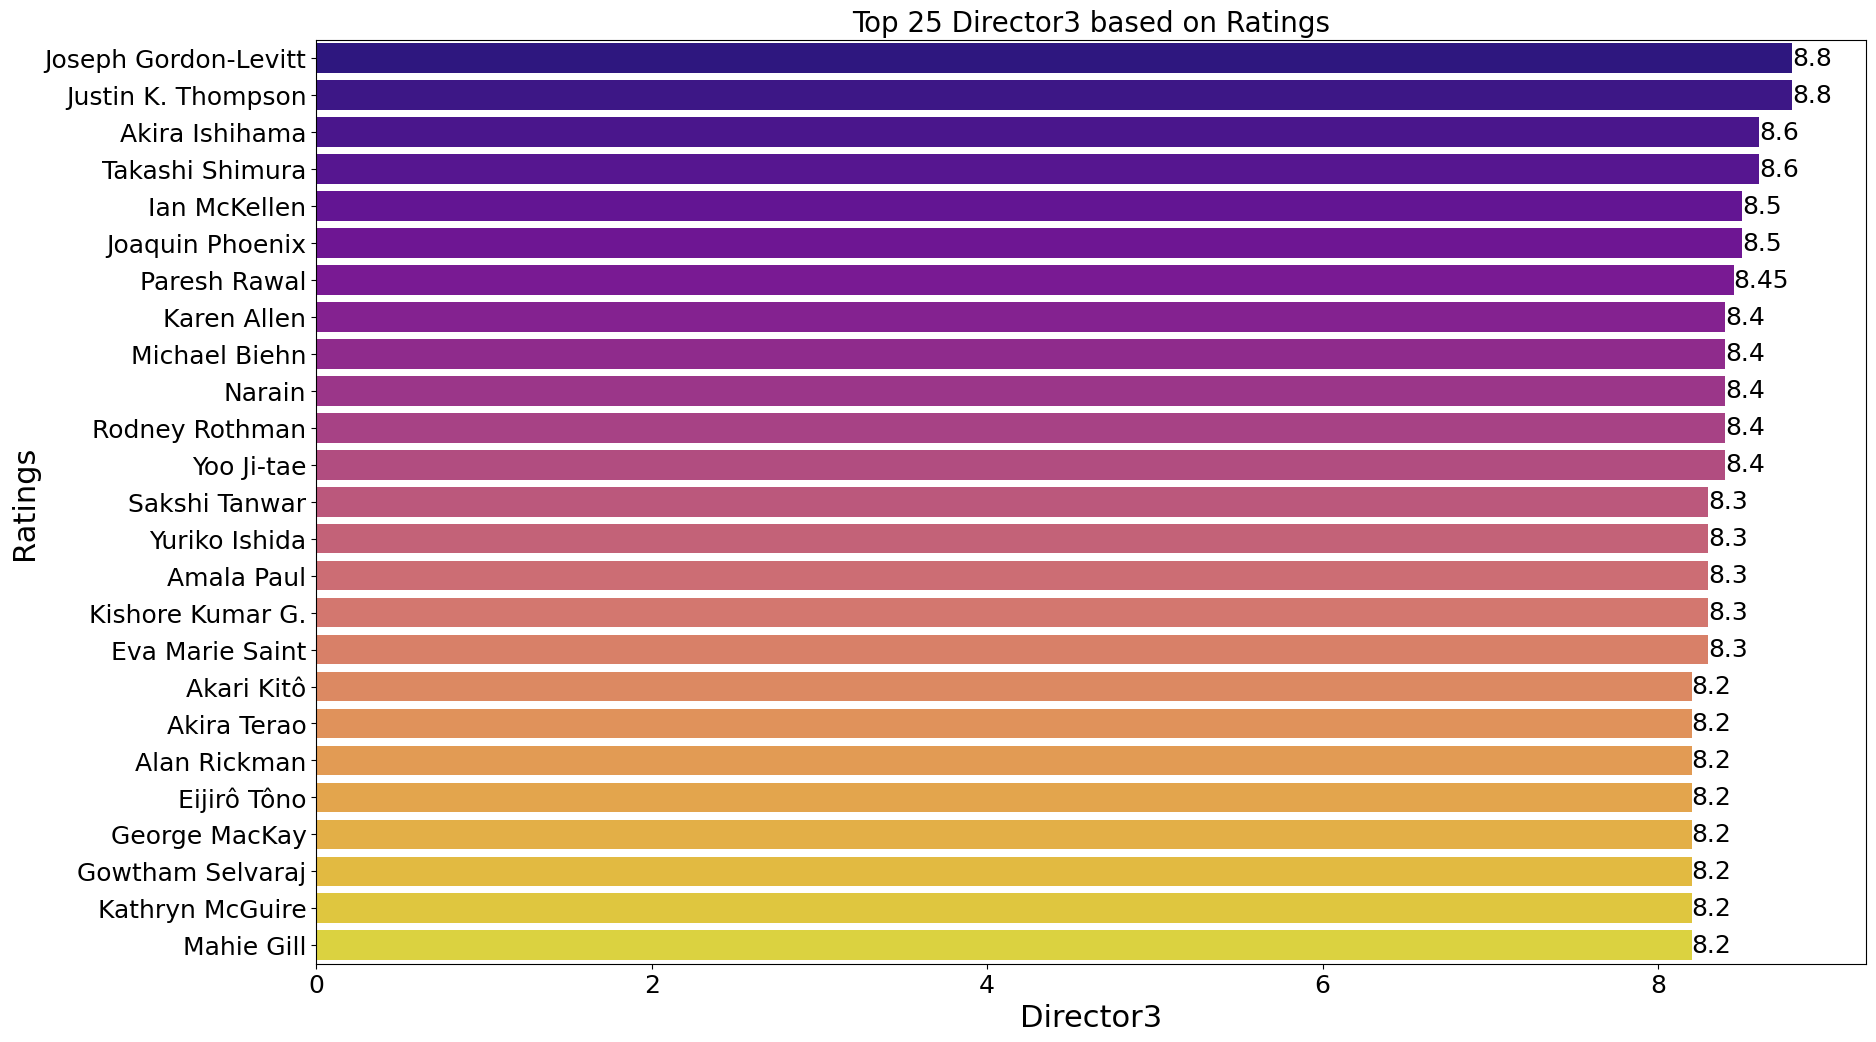

In [81]:
# Visualizing Top 25 Director3 Vs Ratings in barplot

tx = df.groupby('Director3')['Ratings'].mean().nlargest(25)
df_top_25 = tx.sort_values(ascending=False)

plt.figure(figsize=(20,12))
rx = sns.barplot(data=df_top_25.reset_index(), y ='Director3', x ='Ratings', palette="plasma")
plt.xlabel('Director3',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('Ratings',fontsize=22)
plt.yticks(fontsize=18)
plt.title("Top 25 Director3 based on Ratings",fontsize=20)

for i in rx.containers:
    rx.bar_label(i,fontsize=18)
    
plt.show()

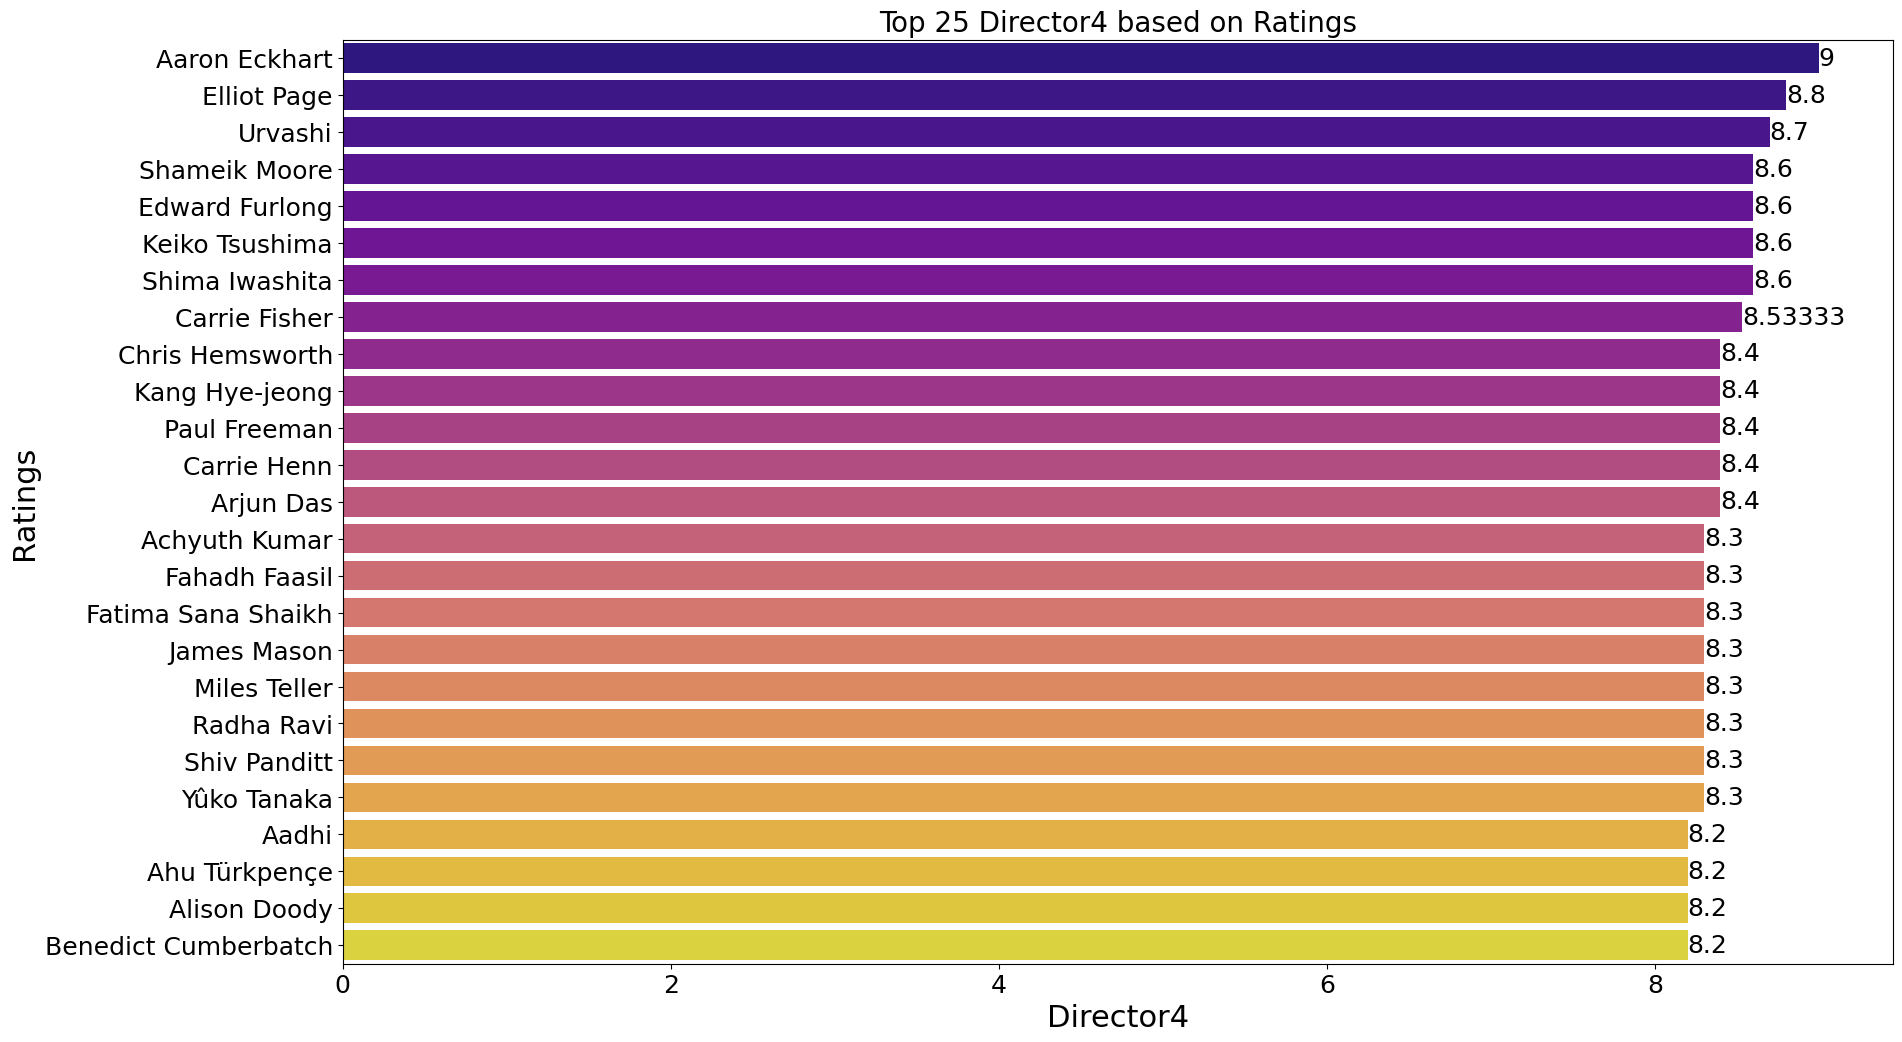

In [80]:
# Visualizing Top 25 Director4 Vs Ratings in barplot

tx = df.groupby('Director4')['Ratings'].mean().nlargest(25)
df_top_25 = tx.sort_values(ascending=False)

plt.figure(figsize=(20,12))
rx = sns.barplot(data=df_top_25.reset_index(), y ='Director4', x ='Ratings', palette="plasma")
plt.xlabel('Director4',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('Ratings',fontsize=22)
plt.yticks(fontsize=18)
plt.title("Top 25 Director4 based on Ratings",fontsize=20)

for i in rx.containers:
    rx.bar_label(i,fontsize=18)
    
plt.show()

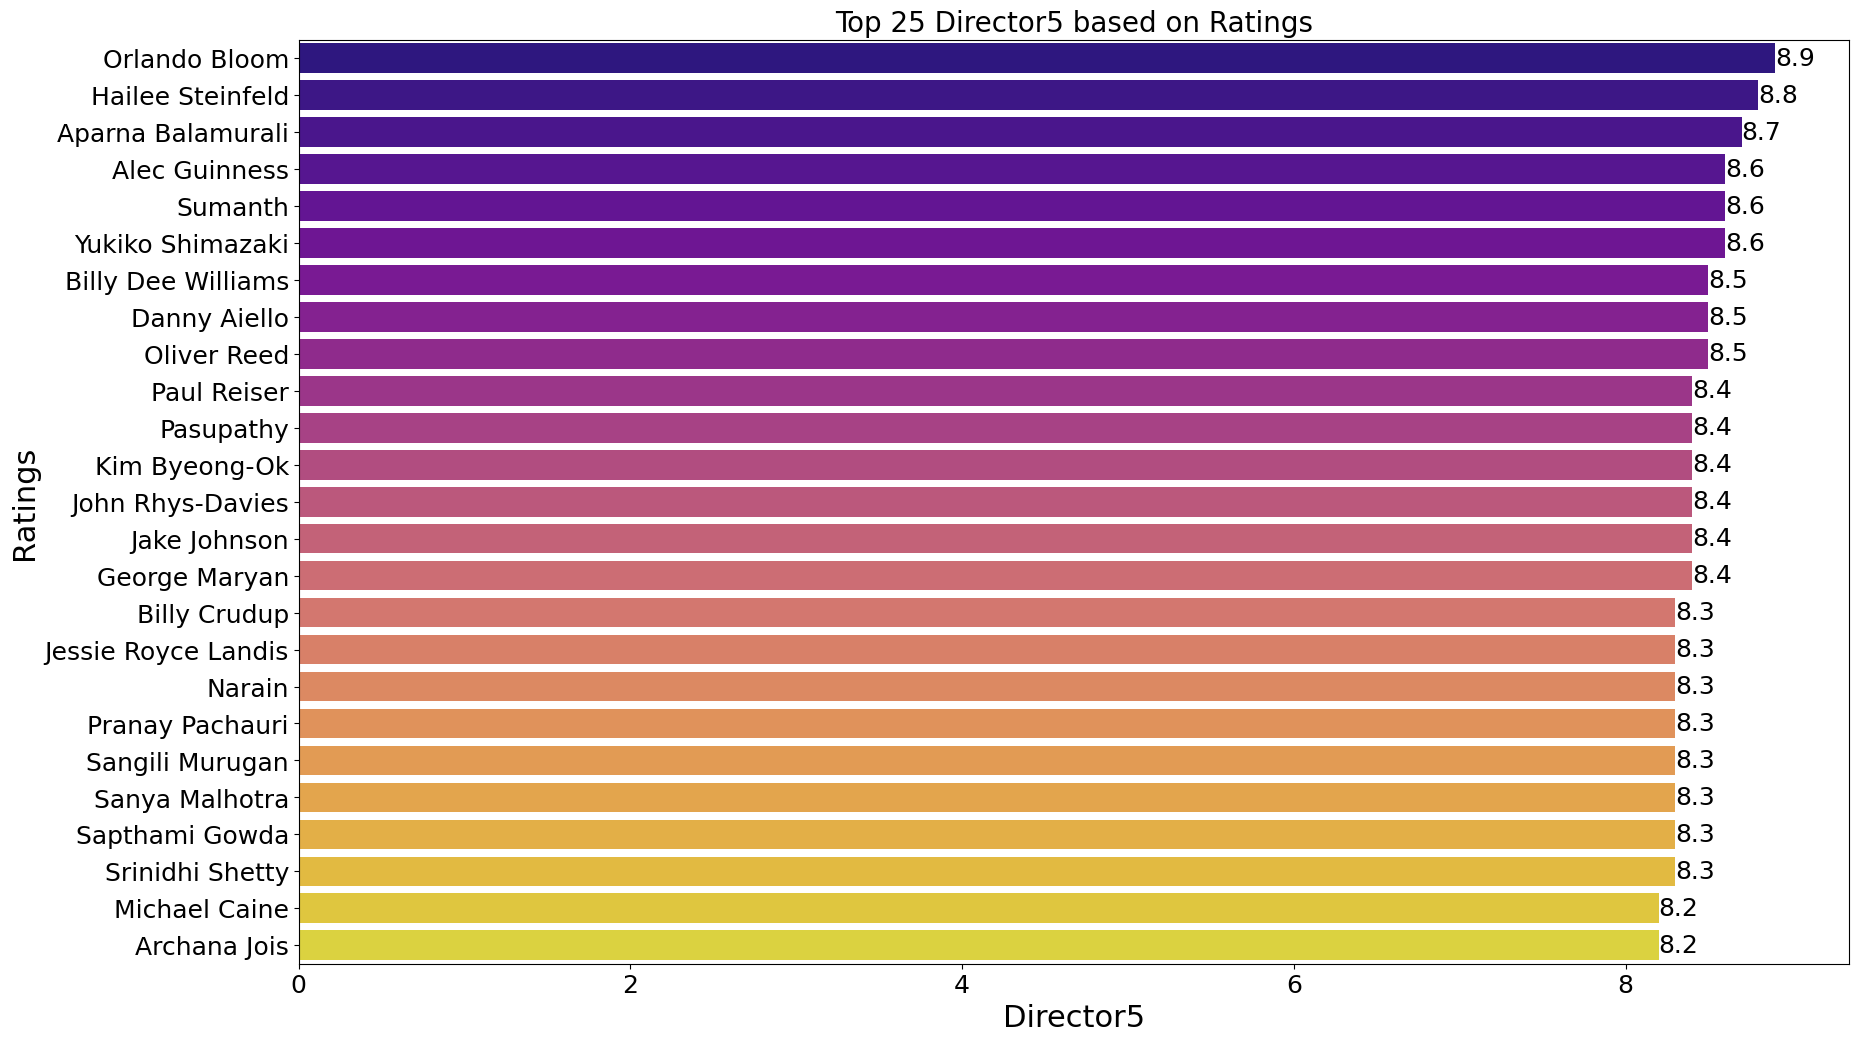

In [79]:
# Visualizing Top 25 Director5 Vs Ratings in barplot

tx = df.groupby('Director5')['Ratings'].mean().nlargest(25)
df_top_25 = tx.sort_values(ascending=False)

plt.figure(figsize=(20,12))
rx = sns.barplot(data=df_top_25.reset_index(), y ='Director5', x ='Ratings', palette="plasma")
plt.xlabel('Director5',fontsize=22)
plt.xticks(fontsize=18)
plt.ylabel('Ratings',fontsize=22)
plt.yticks(fontsize=18)
plt.title("Top 25 Director5 based on Ratings",fontsize=20)

for i in rx.containers:
    rx.bar_label(i,fontsize=18)
    
plt.show()

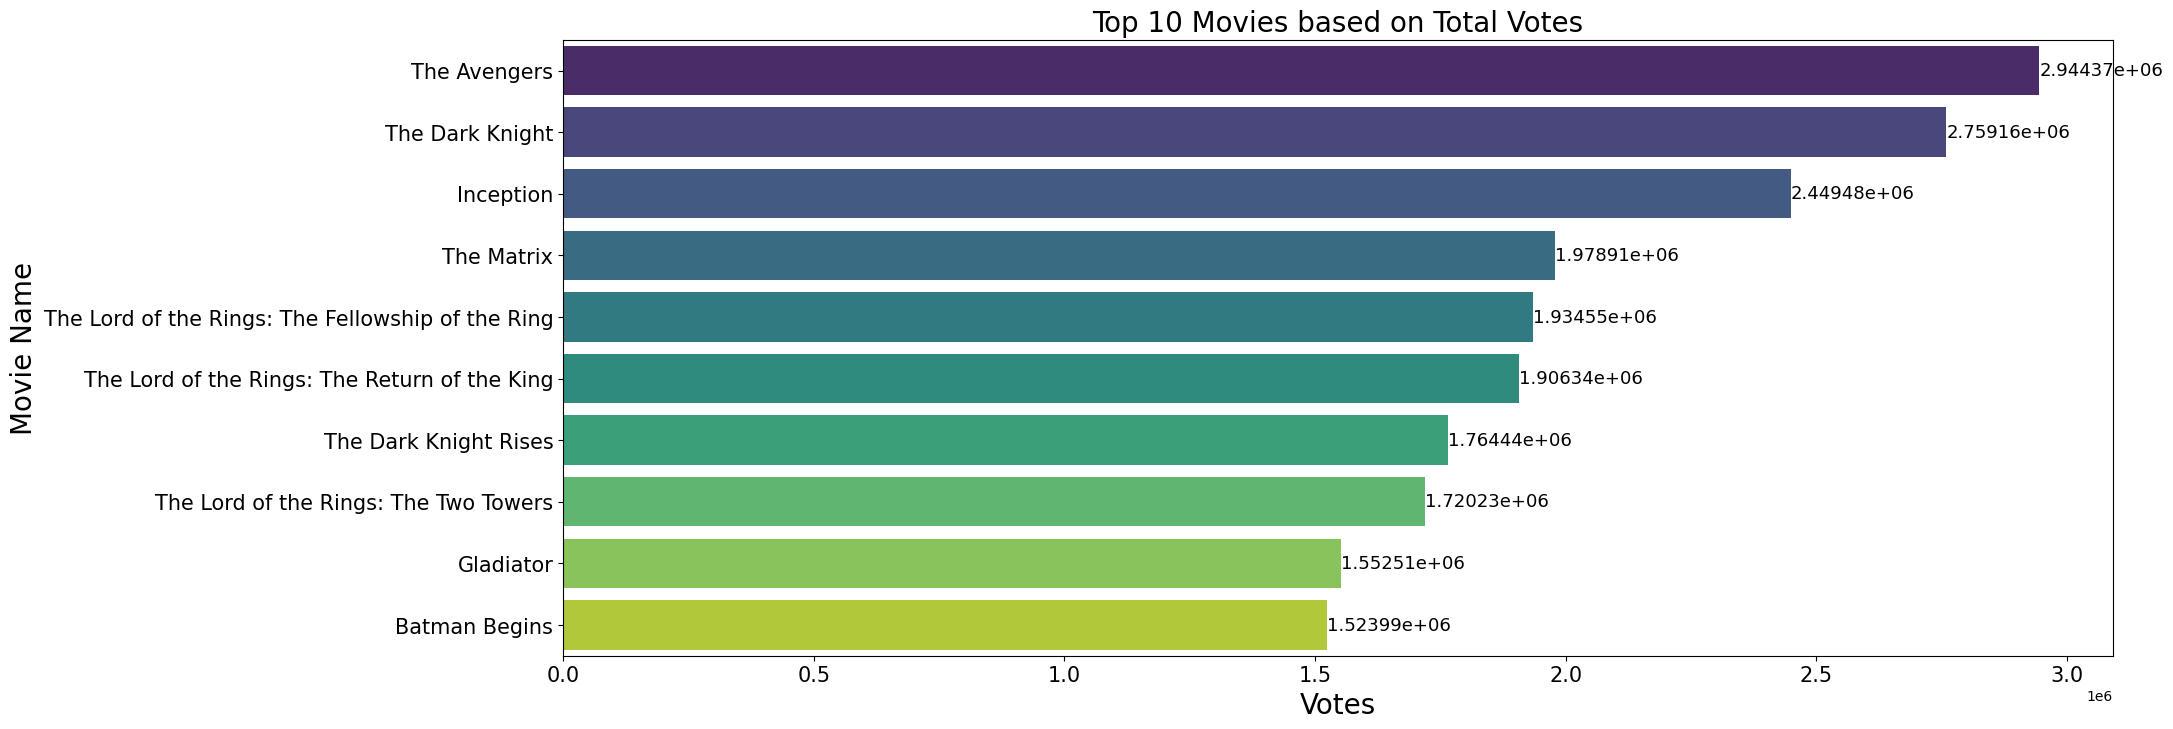

In [78]:
# Visualizing Top 10 Movies Vs Total Votes in barplot

tx = df.groupby('Movie Name')['Votes'].sum().nlargest(10)
df_top_10 = tx.sort_values(ascending=False)

plt.figure(figsize=(20,8))
rx = sns.barplot(data=df_top_10.reset_index(), y='Movie Name', x='Votes', palette="viridis")
plt.xlabel('Votes',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Movie Name',fontsize=20)
plt.yticks(fontsize=15)
plt.title("Top 10 Movies based on Total Votes",fontsize=20)

for i in rx.containers:
    rx.bar_label(i,fontsize=13)
    
plt.show()

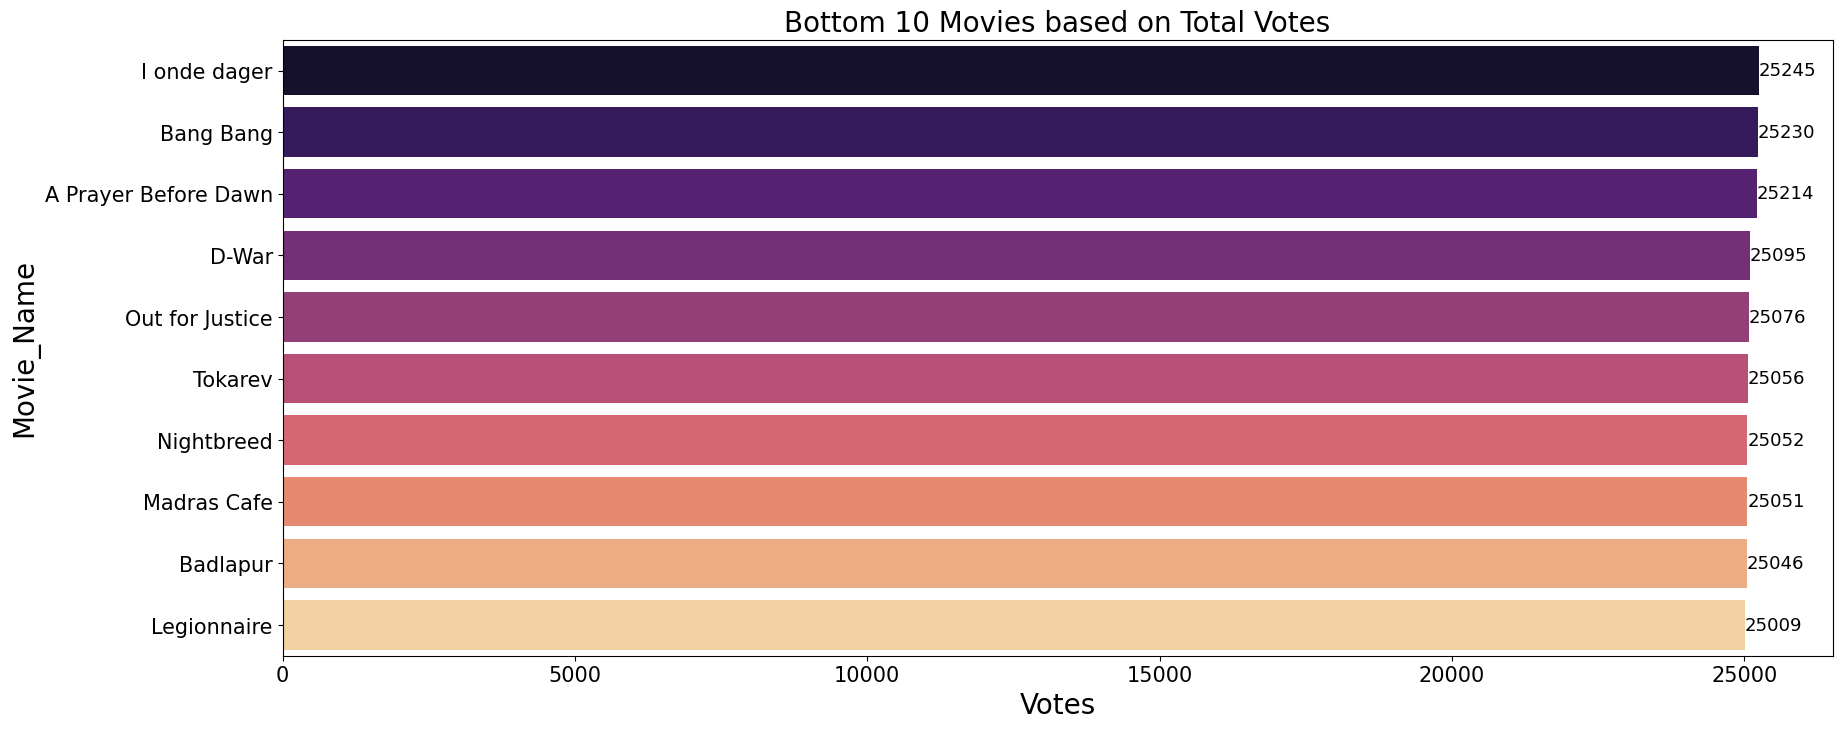

In [76]:
# Visualizing Bottom_10 Movie_Names Vs Total Votes in barplot


bx = df.groupby('Movie Name')['Votes'].sum().nsmallest(10)
df_bottom_10 = bx.sort_values(ascending=False)


plt.figure(figsize=(20,8))
rx = sns.barplot(data=df_bottom_10.reset_index(), y='Movie Name', x='Votes', palette="magma")
plt.xlabel('Votes',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Movie_Name',fontsize=20)
plt.yticks(fontsize=15)
plt.title("Bottom 10 Movies based on Total Votes",fontsize=20)

for i in rx.containers:
    rx.bar_label(i,fontsize=13)
    
plt.show()

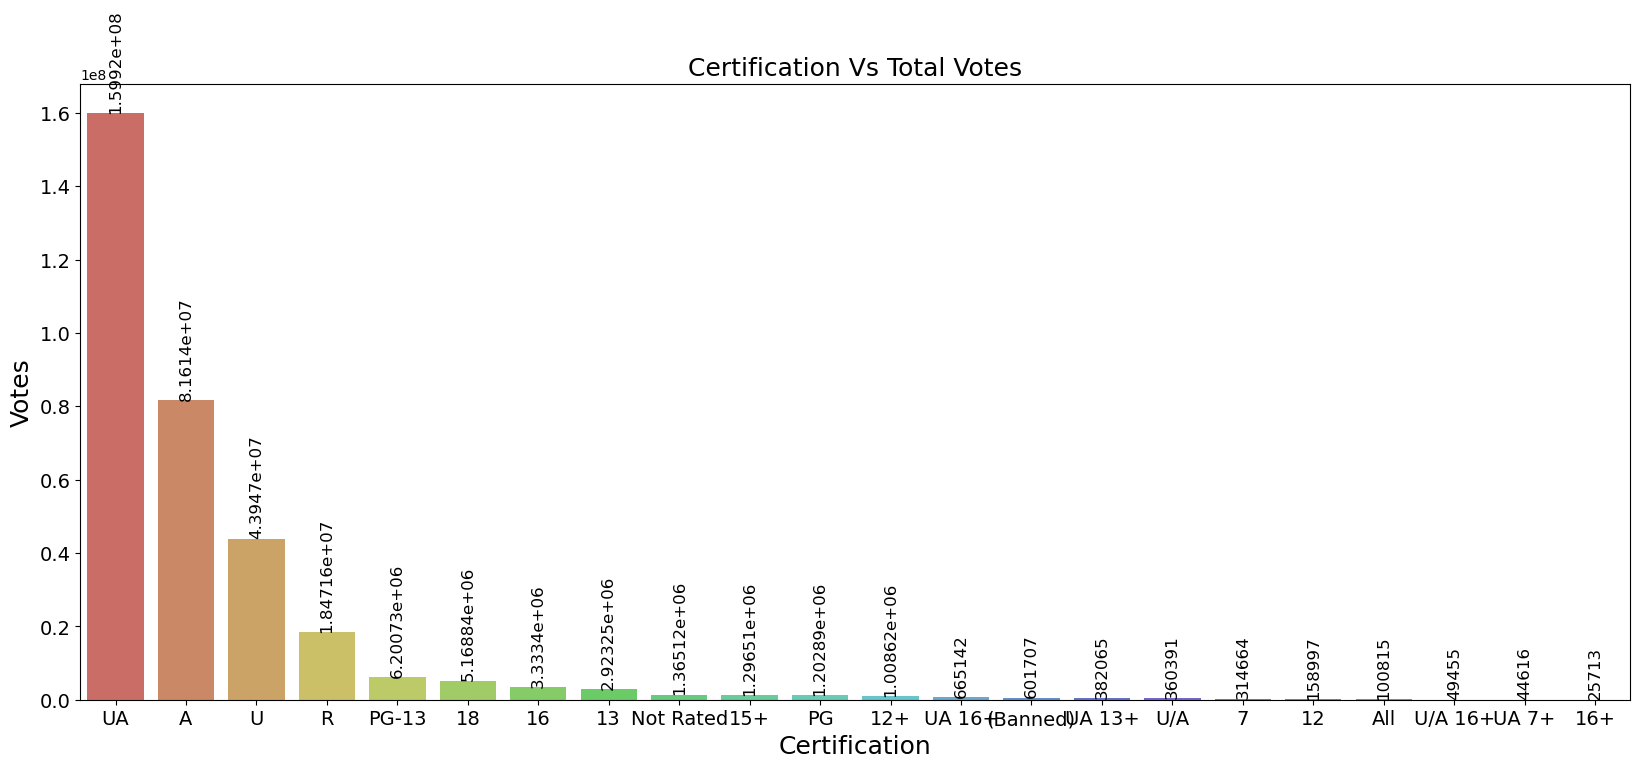

In [84]:
# Visualizing Certification Vs Total Votes in barplot

tx = df.groupby('Certification')['Votes'].sum().sort_values(ascending=False)


plt.figure(figsize=(20,8))
rx = sns.barplot(data=tx.reset_index(), x='Certification', y='Votes', palette="hls")
plt.xlabel('Certification',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Votes',fontsize=18)
plt.yticks(fontsize=14)
plt.title("Certification Vs Total Votes",fontsize=18)

for i in rx.containers:
     rx.bar_label(i,fontsize=12,rotation=90)
    
plt.show()

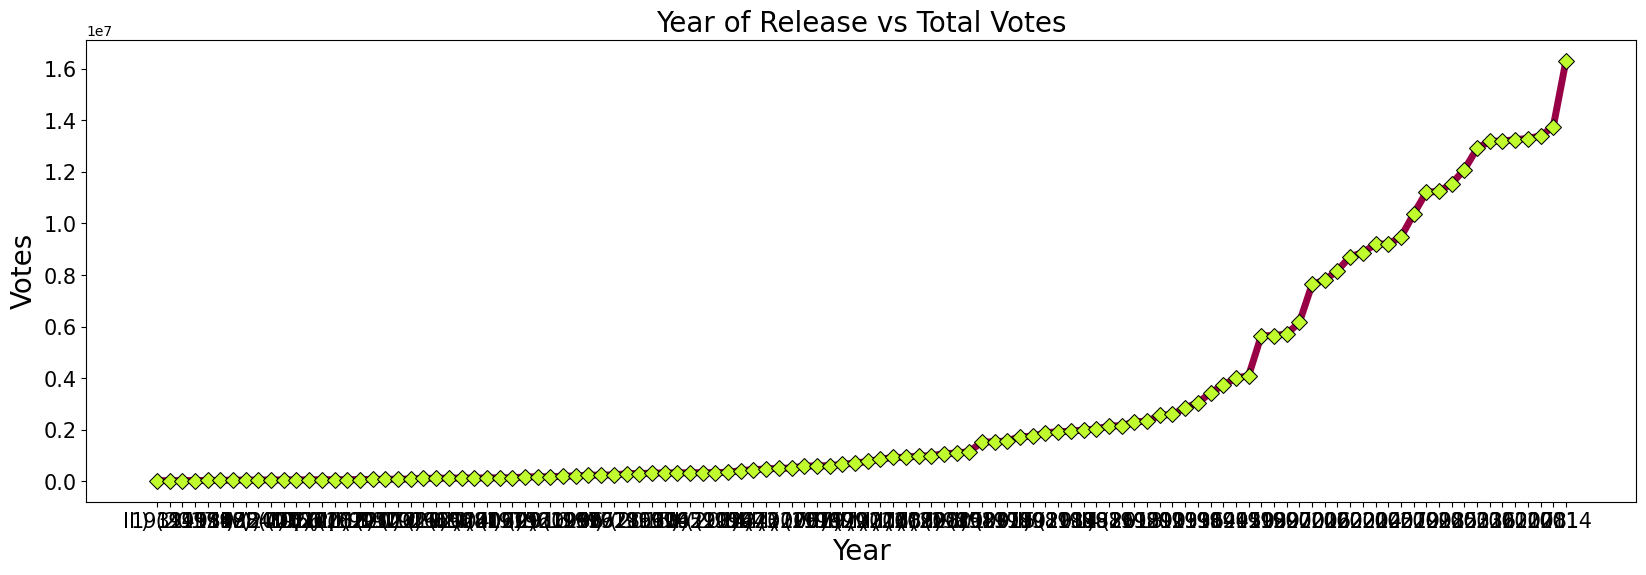

In [86]:
# Visualizing Year Vs Total Votes in lineplot

tx = df.groupby('Year')['Votes'].sum().sort_values(ascending=True)

plt.figure(figsize=(20,6))
rx = sns.lineplot(data =tx.reset_index(),x='Year',y='Votes',color="#990147",
            linestyle = 'solid',linewidth=5,marker="D",markersize=8,markerfacecolor="#c0fb2d",markeredgecolor="#000000")
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Votes',fontsize=20)
plt.yticks(fontsize=15)
plt.title("Year of Release vs Total Votes",fontsize=20)   
plt.show()

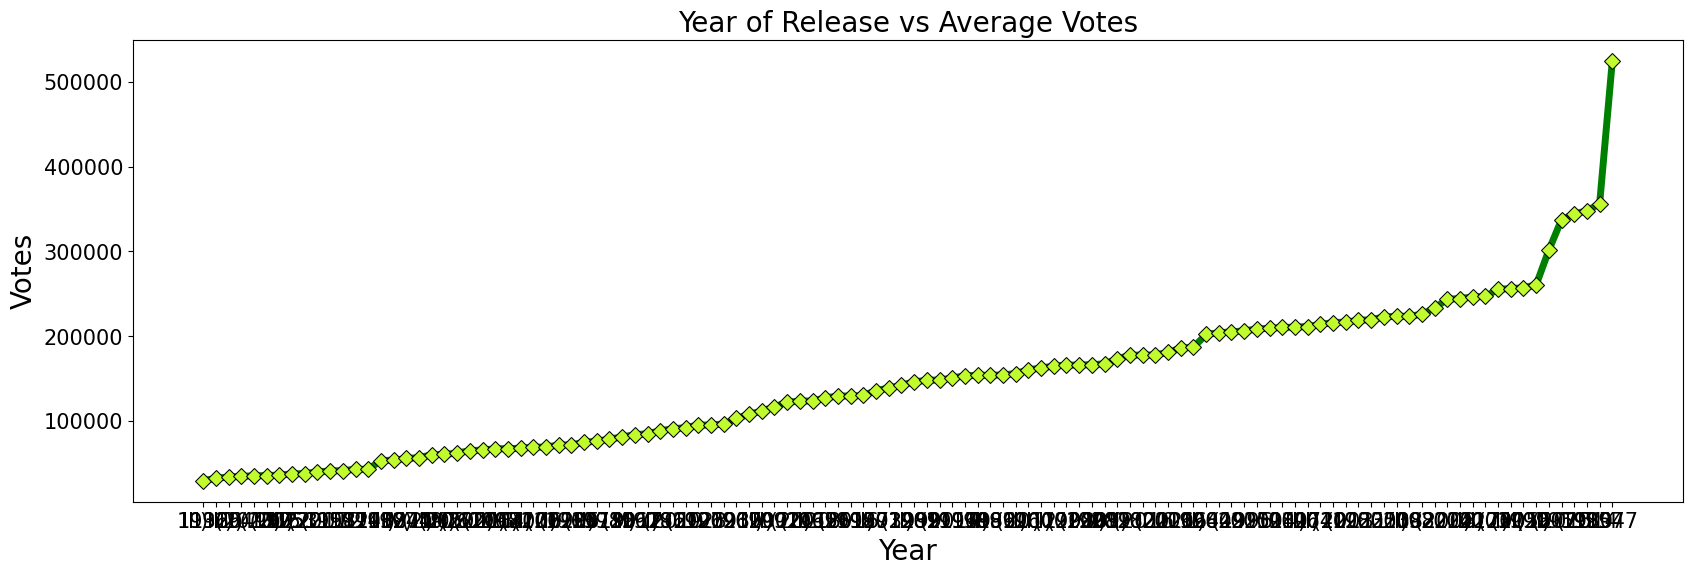

In [87]:
# Visualizing Year Vs Average Votes in lineplot

tx = df.groupby('Year')['Votes'].mean().sort_values(ascending=True)

plt.figure(figsize=(20,6))
rx = sns.lineplot(data =tx.reset_index(),x='Year',y='Votes',color="green",
            linestyle = 'solid',linewidth=5,marker="D",markersize=8,markerfacecolor="#c0fb2d",markeredgecolor="#000000")
plt.xlabel('Year',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Votes',fontsize=20)
plt.yticks(fontsize=15)
plt.title("Year of Release vs Average Votes",fontsize=20)   
plt.show()


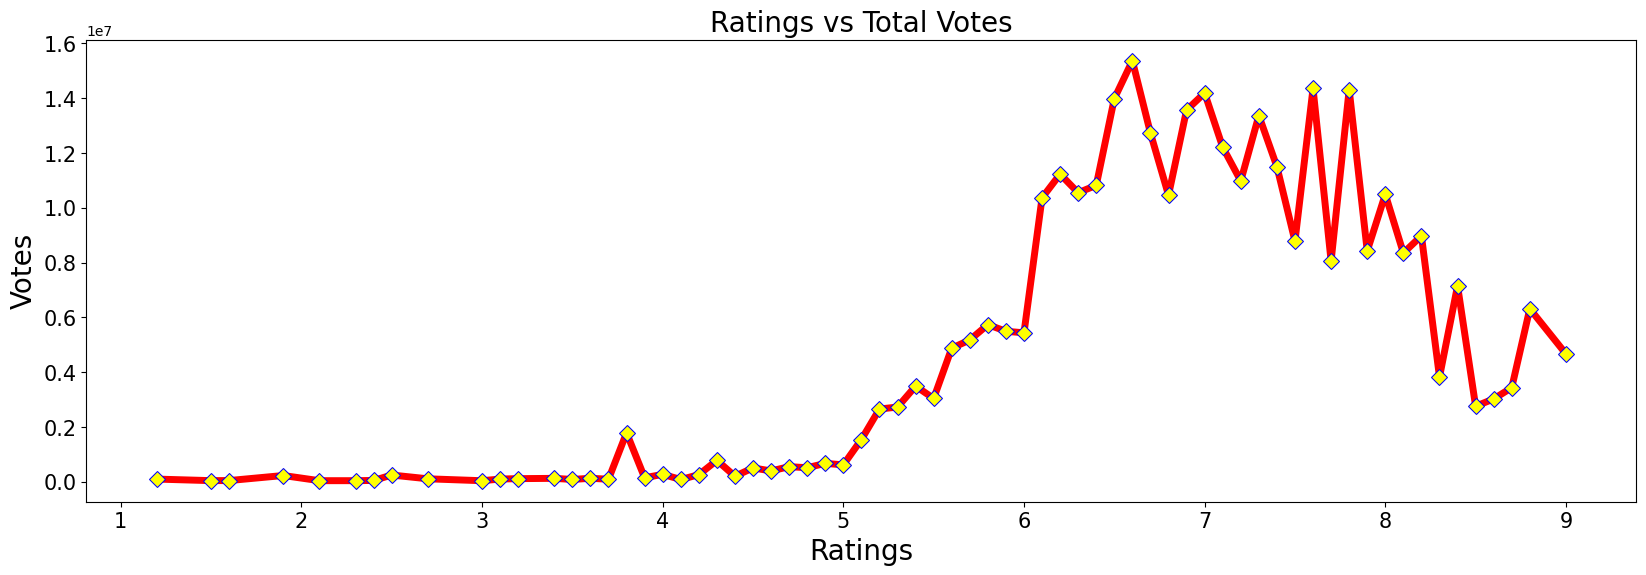

In [92]:
# Visualizing Ratings Vs Total Votes in lineplot

tx = df.groupby('Ratings')['Votes'].sum().sort_values(ascending=False)

plt.figure(figsize=(20,6))
rx = sns.lineplot(data =tx.reset_index(),x='Ratings',y='Votes',color="red",
            linestyle = 'solid',linewidth=5,marker="D",markersize=8,markerfacecolor="yellow",markeredgecolor="blue")
plt.xlabel('Ratings',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Votes',fontsize=20)
plt.yticks(fontsize=15)
plt.title("Ratings vs Total Votes",fontsize=20)   
plt.show()

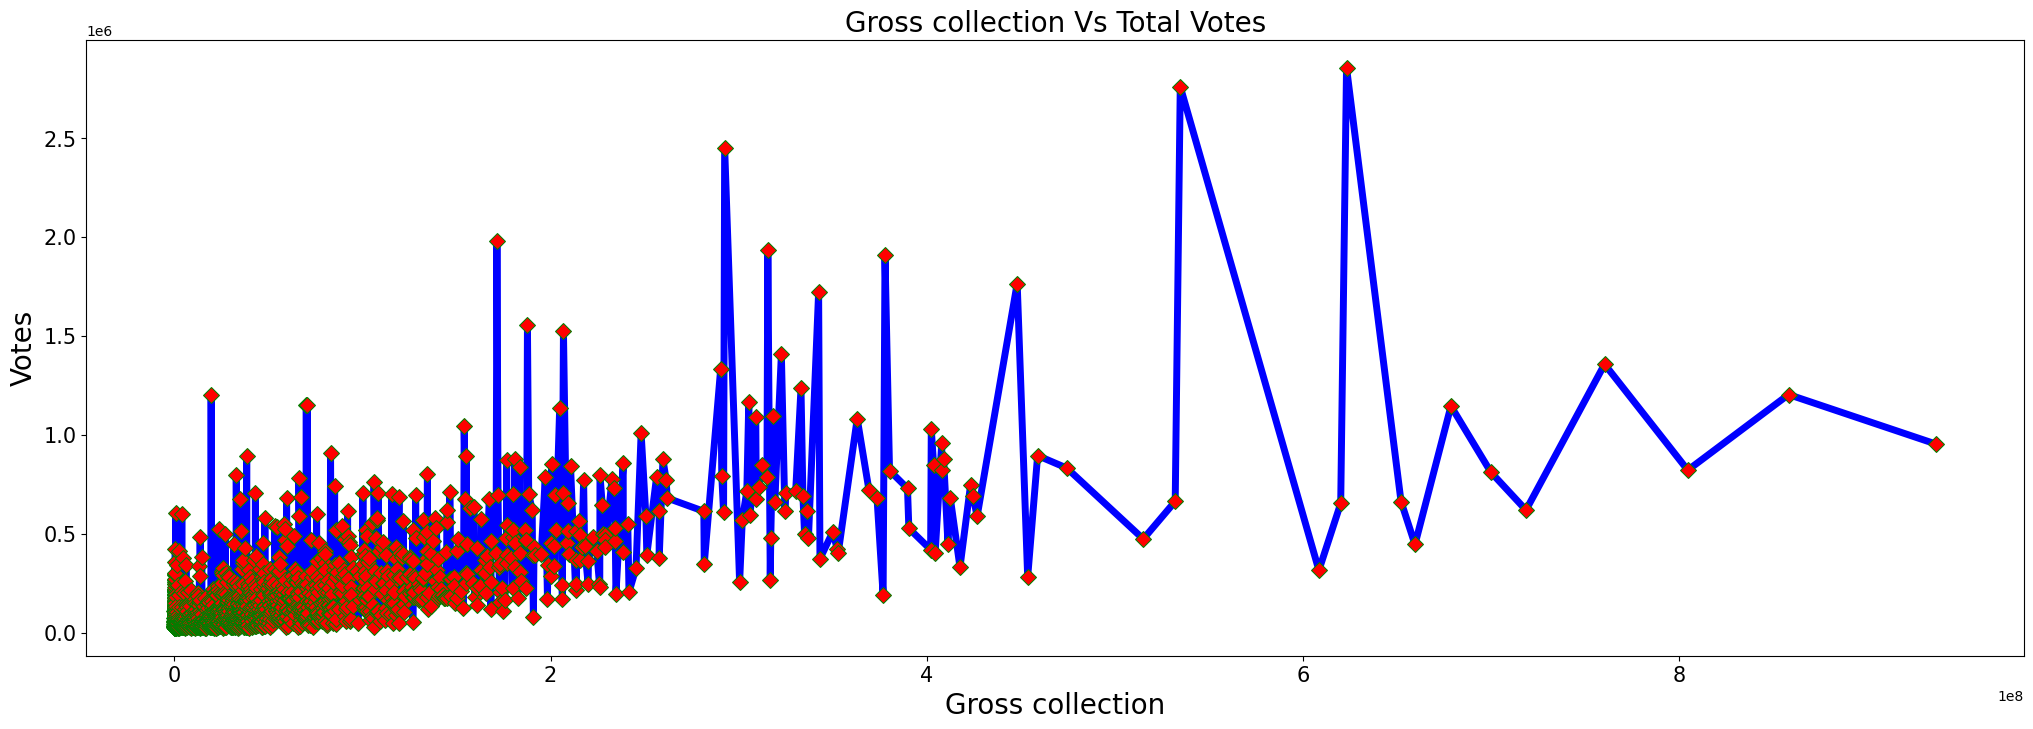

In [96]:
# Visualizing Gross Collection Vs Total Votes in lineplot

tx = df.groupby('Gross collection')['Votes'].sum().sort_values(ascending=False)

plt.figure(figsize=(25,8))
rx = sns.lineplot(data =tx.reset_index(),x='Gross collection',y='Votes',color="blue",
            linestyle = 'solid',linewidth=5,marker="D",markersize=8,markerfacecolor="red",markeredgecolor="green")
plt.xlabel('Gross collection',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Votes',fontsize=20)
plt.yticks(fontsize=15)
plt.title("Gross collection Vs Total Votes",fontsize=20)   
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 0 to 1836
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie Name        1837 non-null   object 
 1   Duration          1837 non-null   int64  
 2   Year              1837 non-null   object 
 3   Ratings           1837 non-null   float64
 4   Metascore         1644 non-null   float64
 5   Director1         1837 non-null   object 
 6   Director2         1837 non-null   object 
 7   Director3         1836 non-null   object 
 8   Director4         1836 non-null   object 
 9   Director5         1835 non-null   object 
 10  Director6         115 non-null    object 
 11  Director7         13 non-null     object 
 12  Director8         6 non-null      object 
 13  Director9         4 non-null      object 
 14  Director10        1 non-null      object 
 15  Votes             1837 non-null   int64  
 16  Gross collection  1837 non-null   float64


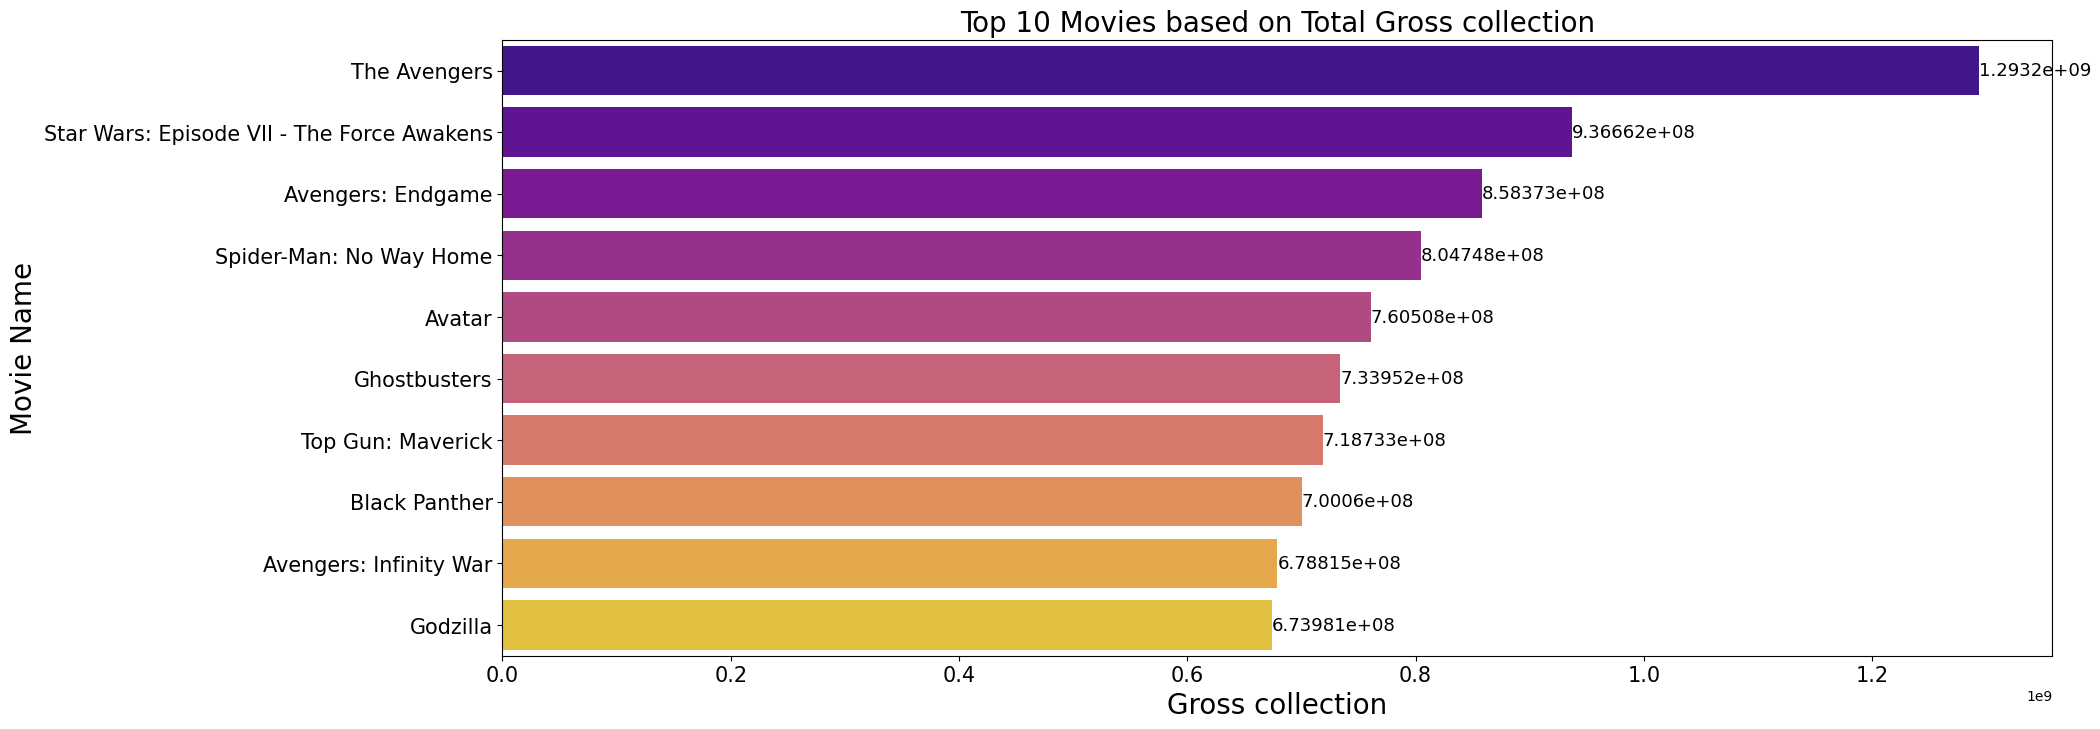

In [97]:
# Visualizing Top 10 Movies based on Total Gross Collection in barplot


tx = df.groupby('Movie Name')['Gross collection'].sum().nlargest(10)
df_top_10 = tx.sort_values(ascending=False)


plt.figure(figsize=(20,8))
rx = sns.barplot(data=df_top_10.reset_index(), y='Movie Name', x='Gross collection', palette="plasma")
plt.xlabel('Gross collection',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Movie Name',fontsize=20)
plt.yticks(fontsize=15)
plt.title("Top 10 Movies based on Total Gross collection",fontsize=20)

for i in rx.containers:
     rx.bar_label(i,fontsize=13)
    
plt.show()

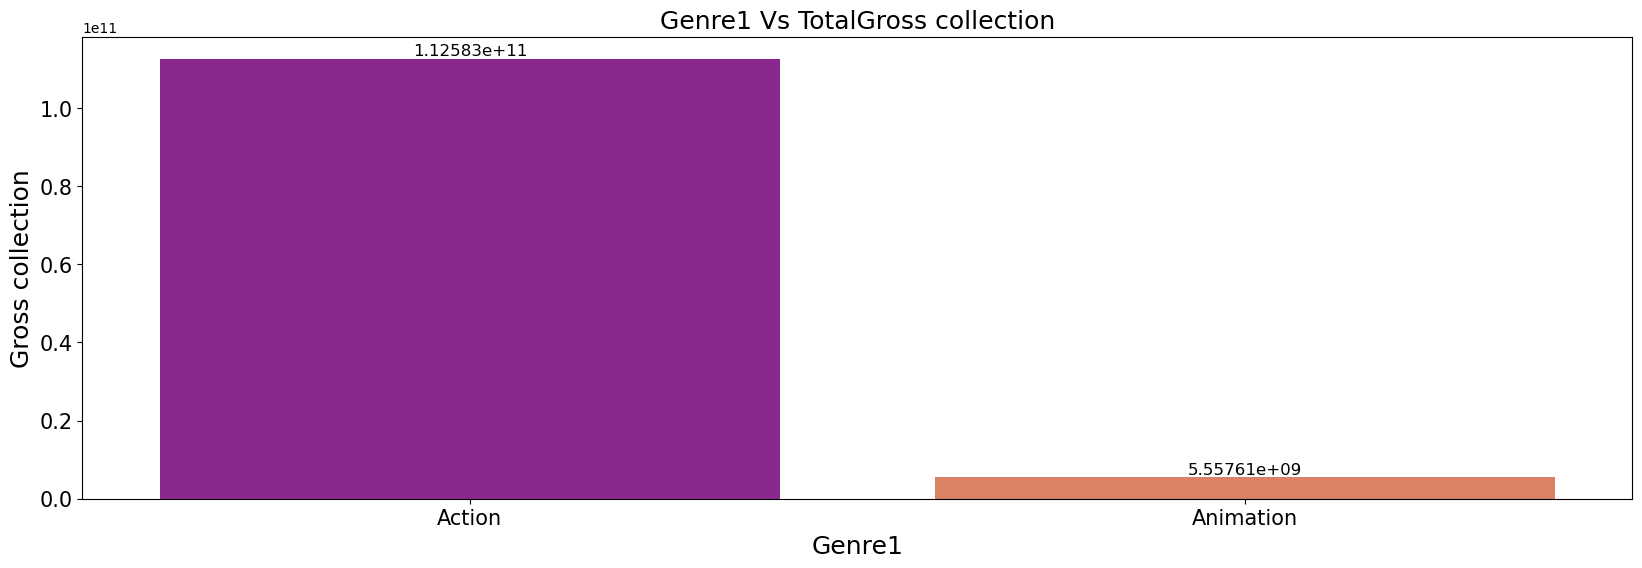

In [102]:
# Visualizing Genre1 Vs Total Gross collection in barplot

tx = df.groupby('Genre1')['Gross collection'].sum().sort_values(ascending=False)

plt.figure(figsize=(20,6))
rx = sns.barplot(data=tx.reset_index(), x='Genre1', y='Gross collection', palette="plasma")
plt.xlabel('Genre1',fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Gross collection',fontsize=18)
plt.yticks(fontsize=15)
plt.title("Genre1 Vs TotalGross collection",fontsize=18)

for i in rx.containers:
     rx.bar_label(i,fontsize=12)
    
plt.show()

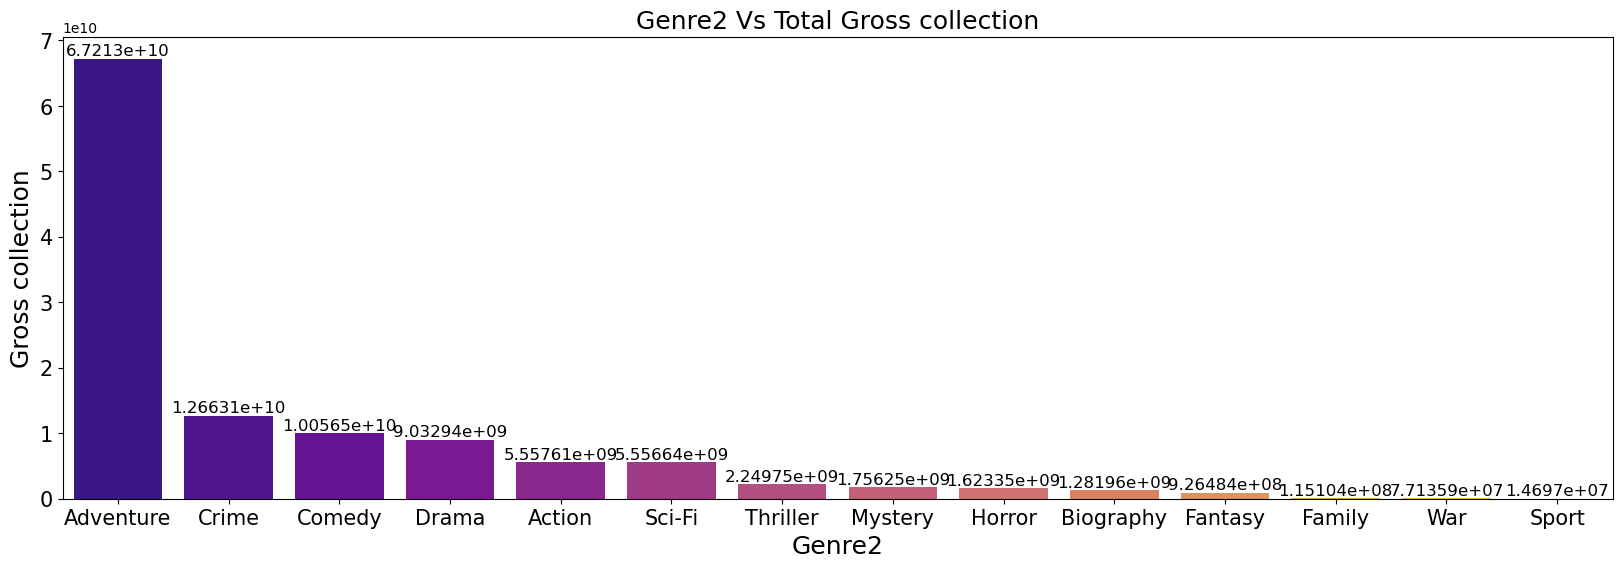

In [103]:
# Visualizing Genre2 Vs Total Gross collection in barplot

tx = df.groupby('Genre2')['Gross collection'].sum().sort_values(ascending=False)

plt.figure(figsize=(20,6))
rx = sns.barplot(data=tx.reset_index(), x='Genre2', y='Gross collection', palette="plasma")
plt.xlabel('Genre2',fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Gross collection',fontsize=18)
plt.yticks(fontsize=15)
plt.title("Genre2 Vs Total Gross collection",fontsize=18)

for i in rx.containers:
     rx.bar_label(i,fontsize=12)
    
plt.show()

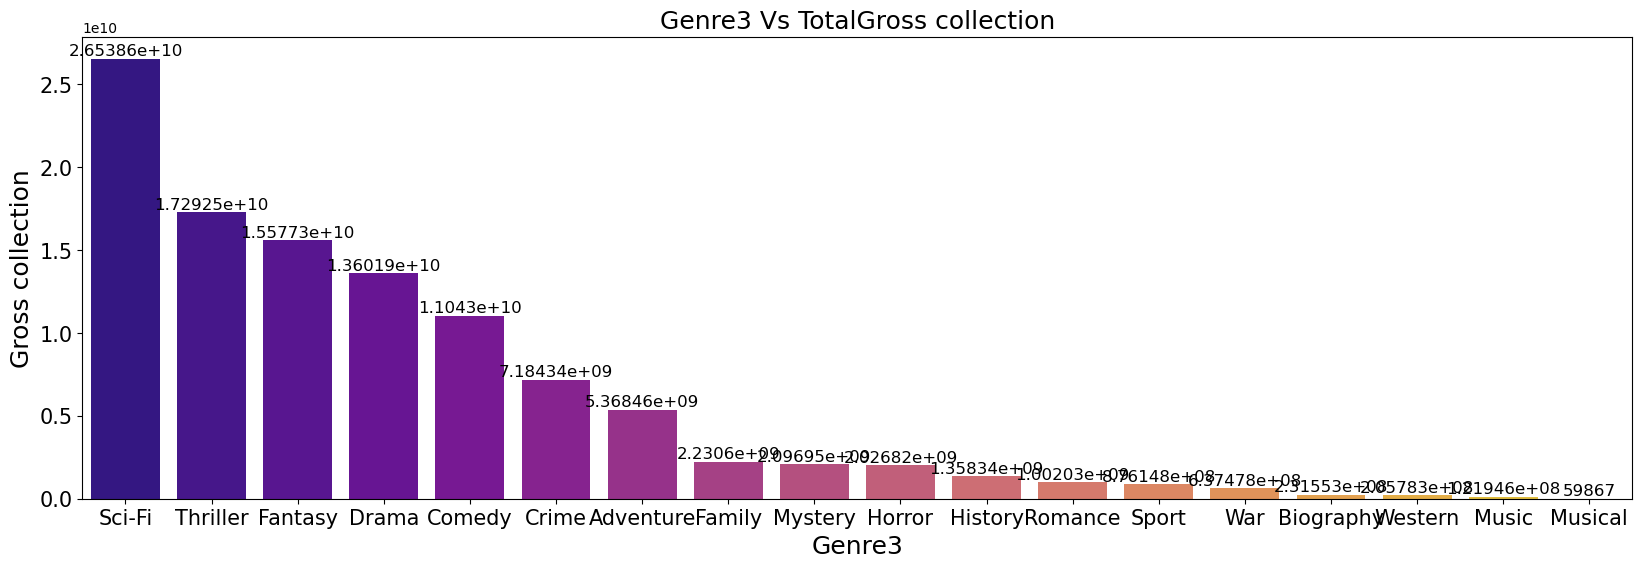

In [104]:
# Visualizing Genre3 Vs Total Gross collection in barplot

tx = df.groupby('Genre3')['Gross collection'].sum().sort_values(ascending=False)

plt.figure(figsize=(20,6))
rx = sns.barplot(data=tx.reset_index(), x='Genre3', y='Gross collection', palette="plasma")
plt.xlabel('Genre3',fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Gross collection',fontsize=18)
plt.yticks(fontsize=15)
plt.title("Genre3 Vs TotalGross collection",fontsize=18)

for i in rx.containers:
     rx.bar_label(i,fontsize=12)
    
plt.show()

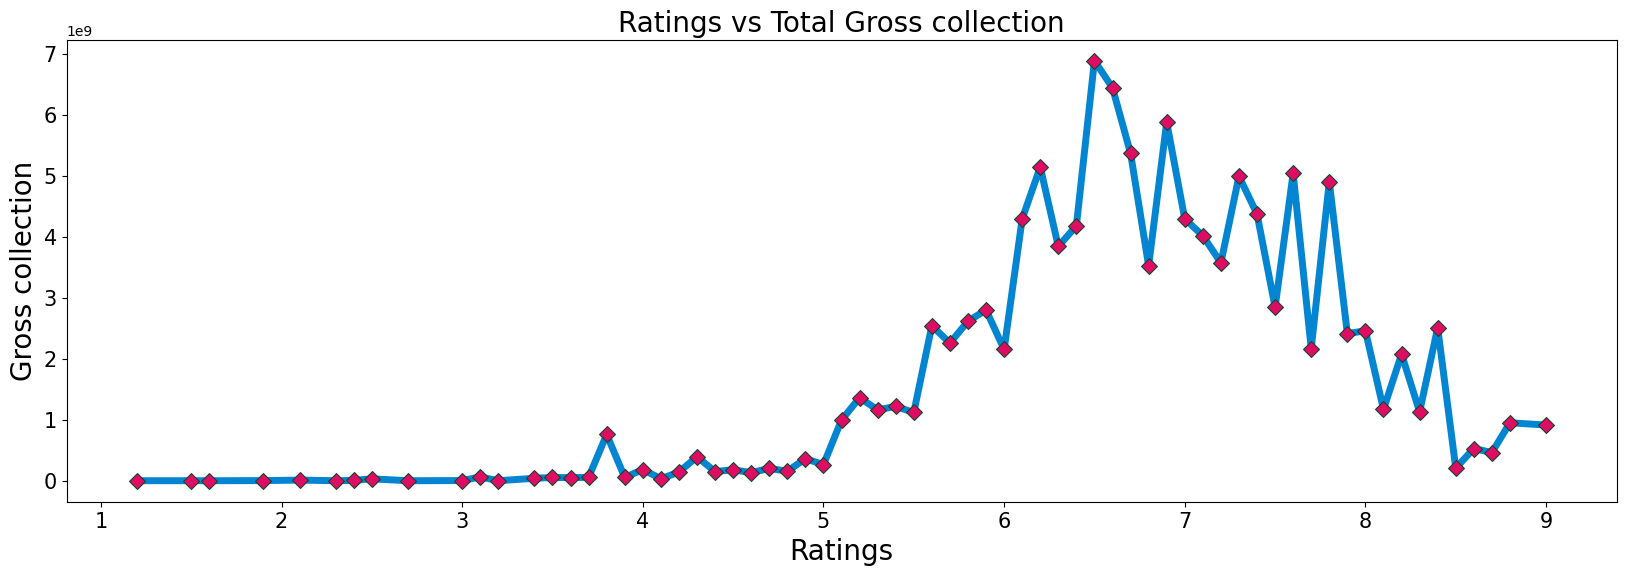

In [105]:
# Visualizing Ratings Vs Total Gross Collection in lineplot

tx = df.groupby('Ratings')['Gross collection'].sum().sort_values(ascending=False)

plt.figure(figsize=(20,6))
rx = sns.lineplot(data =tx.reset_index(),x='Ratings',y='Gross collection',color="#0485d1",
            linestyle = 'solid',linewidth=5,marker="D",markersize=8,markerfacecolor="#de0c62",markeredgecolor="#05472a")
plt.xlabel('Ratings',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Gross collection',fontsize=20)
plt.yticks(fontsize=15)
plt.title("Ratings vs Total Gross collection",fontsize=20)   
plt.show()

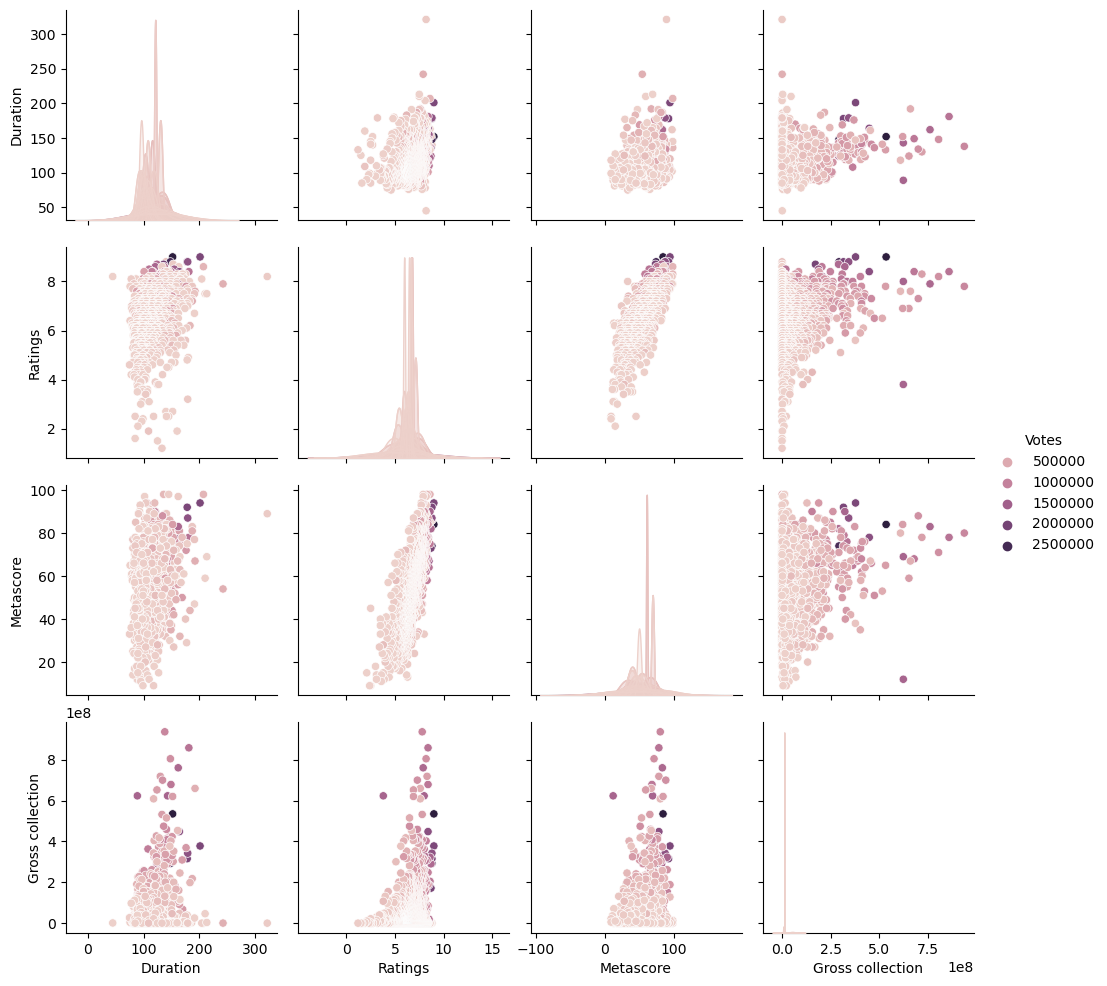

In [106]:
sns.pairplot(df, hue="Votes")

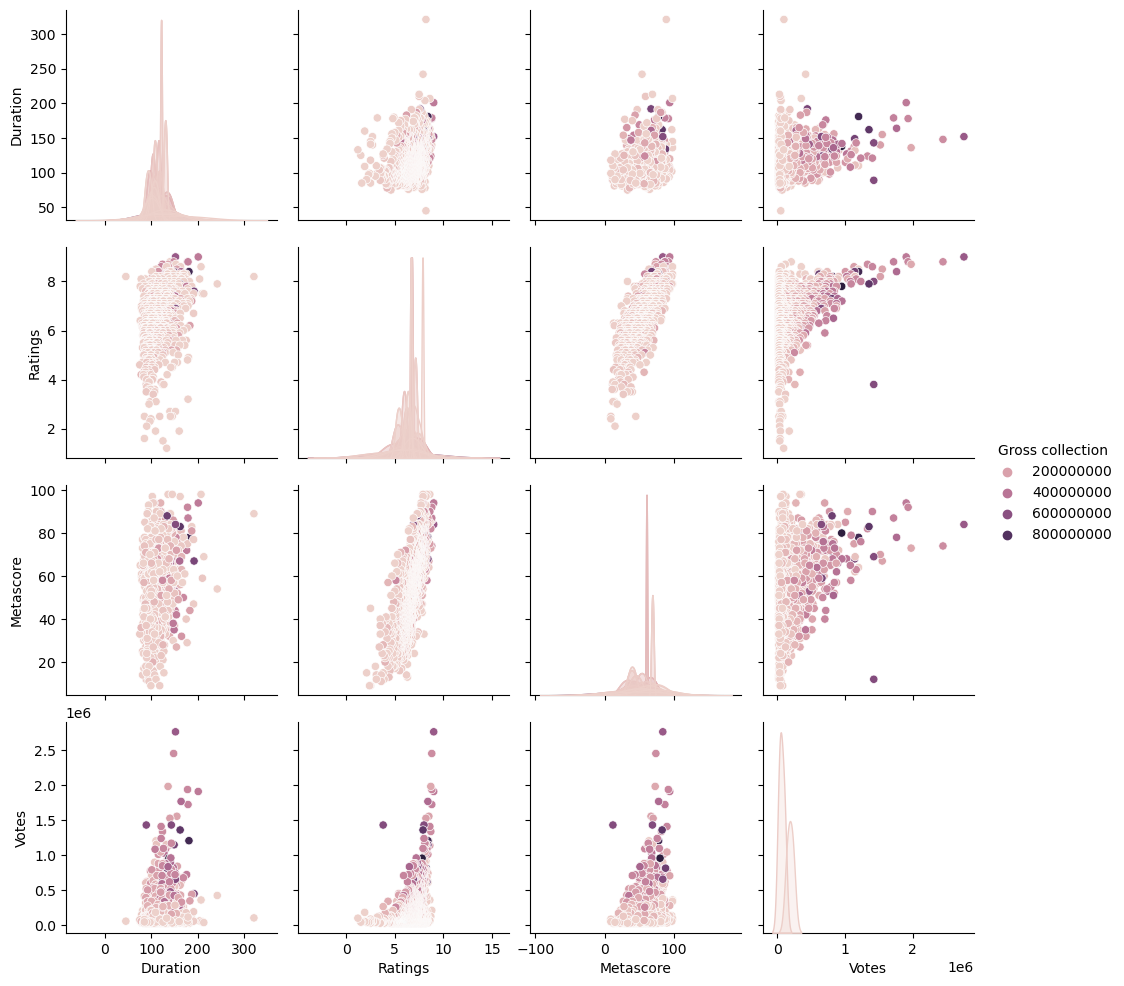

In [107]:
sns.pairplot(df, hue="Gross collection")

In [147]:
# Let us process Outliers detection and Removal
from scipy.stats import zscore

df2 = df.select_dtypes(include=['float64', 'int64', 'int'])
df2 = df2.dropna().astype(float)
z = np.abs(zscore(df2))
threshold = 3
df1 = df2[(z<3).all(axis = 1)]

In [148]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df1.shape)

Shape of dataset after removing outliers : (1556, 6)


In [150]:
df1.skew()

Duration            0.613042
Ratings            -0.215752
Metascore           0.111373
Votes               1.893638
Gross collection    1.785618
Popularity         -0.229212
dtype: float64

In [151]:
from scipy.stats import boxcox

df1['Votes']=boxcox(df1['Votes'],-1.4)
df1['Gross collection']=boxcox(df1['Gross collection'],0.5)
df1['Duration']=boxcox(df1['Duration'],0.5)

In [152]:
df1.skew()

Duration            0.421961
Ratings            -0.215752
Metascore           0.111373
Votes               0.000000
Gross collection    0.429595
Popularity         -0.229212
dtype: float64

All features skewness is now transform within limit of -0.5 to 0.5

In [153]:
df1.corr()

Duration   Ratings  Metascore     Votes  Gross collection  \
Duration          1.000000  0.340887   0.264653  0.295995          0.255037   
Ratings           0.340887  1.000000   0.739221  0.280965          0.125646   
Metascore         0.264653  0.739221   1.000000  0.164446          0.089945   
Votes             0.295995  0.280965   0.164446  1.000000          0.553682   
Gross collection  0.255037  0.125646   0.089945  0.553682          1.000000   
Popularity        0.330495  0.956091   0.704826  0.284378          0.126200   

                  Popularity  
Duration            0.330495  
Ratings             0.956091  
Metascore           0.704826  
Votes               0.284378  
Gross collection    0.126200  
Popularity          1.000000

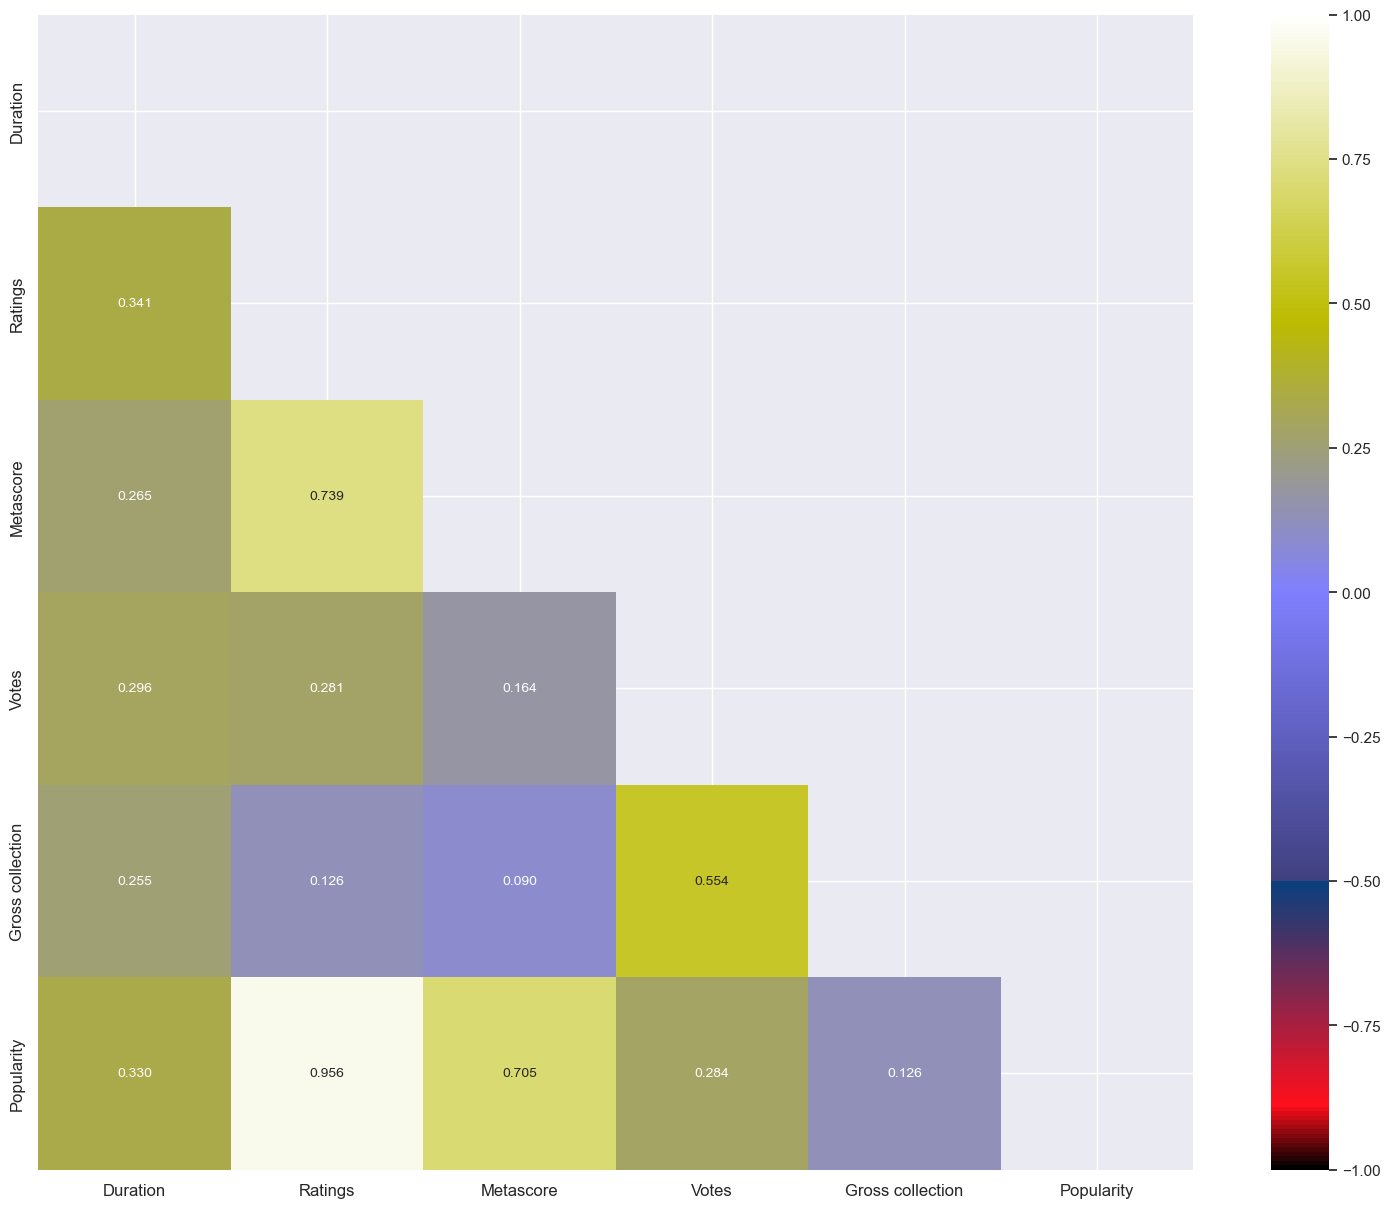

In [154]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Target Variable: Gross Collection

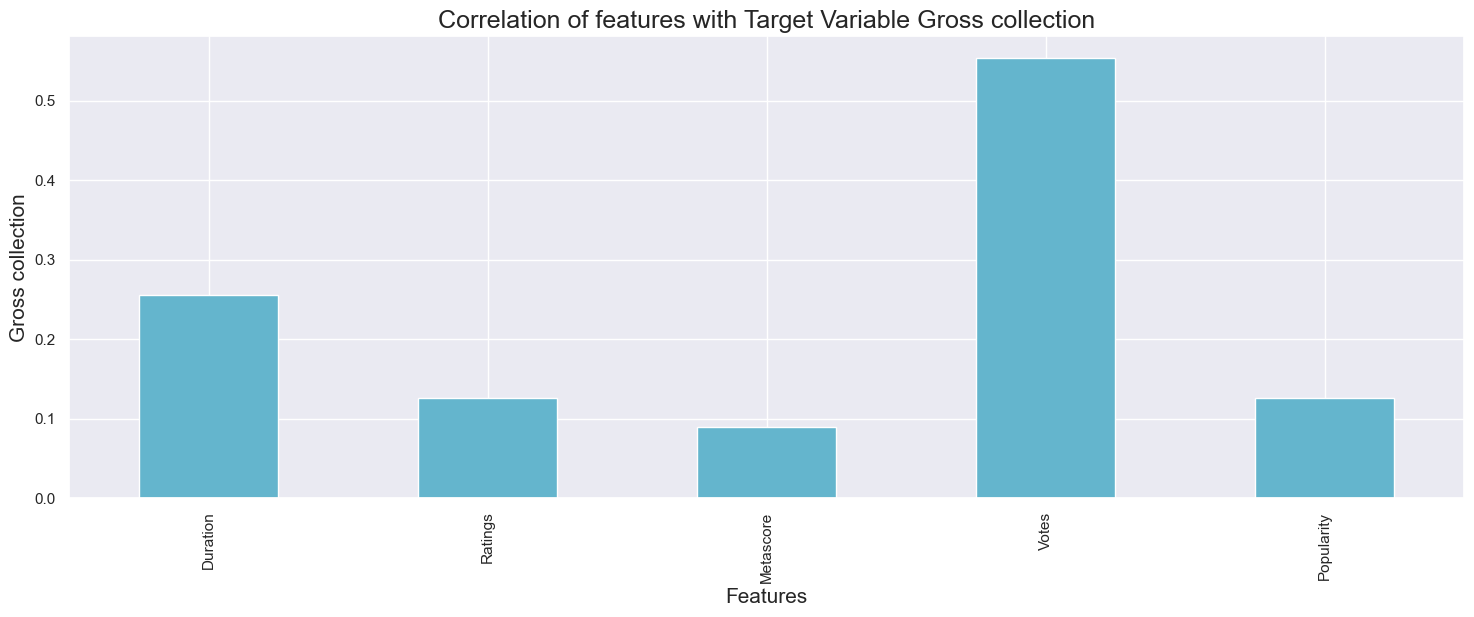

In [155]:
plt.figure(figsize = (18,6))
df1.corr()['Gross collection'].drop(['Gross collection']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Gross collection',fontsize=15)
plt.title('Correlation of features with Target Variable Gross collection',fontsize = 18)
plt.show()

Metascore is very poorly correlated with target variable. Votes, Duration, Ratings and Popularity are highly correleated with target variable.

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF          Features
0  183.793083          Duration
1  810.067488           Ratings
2   27.206086         Metascore
3  187.930106             Votes
4    3.355055  Gross collection
5  724.438058        Popularity

Multicollinearity observed due to interrelations with each features

Hence removing some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly. Address Multicollinerity is to Scaled Data and then apply PCA.

In [157]:
# Standard Scaling
X=df1.drop(columns =['Gross collection'])
Y=df1['Gross collection']

In [158]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

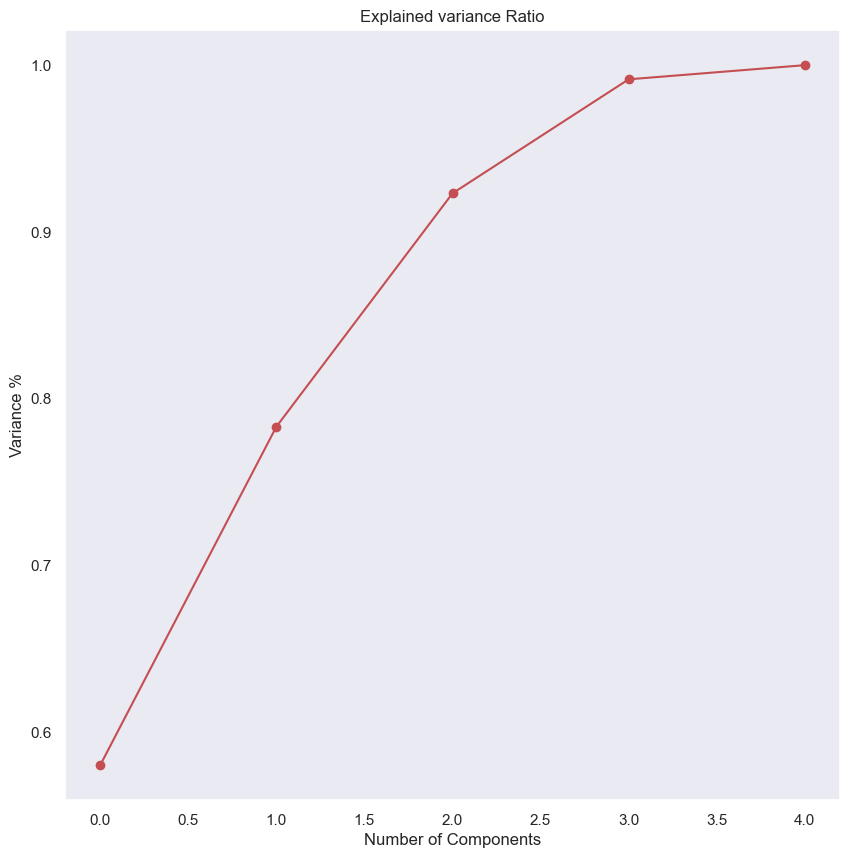

In [159]:
from sklearn.decomposition import PCA
pca = PCA()
# Let us plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

As per the graph, 3 principal components attribute for 90% of variation in the data. Let us pick the first 3 components for our prediction.

In [160]:
pca_new = PCA(n_components=3)
x_new = pca_new.fit_transform(X_scale)

In [161]:
principle_x=pd.DataFrame(x_new,columns=np.arange(3))

In [162]:
# Let us Check Multicollinearity after applying PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

VIF  Features
0  1.0         0
1  1.0         1
2  1.0         2

# Phase 4: Machine Learning Model Building

In [164]:
!pip install xgboost

                                              0.0/70.9 MB ? eta -:--:--
                                              0.1/70.9 MB 3.3 MB/s eta 0:00:22
                                              0.2/70.9 MB 2.6 MB/s eta 0:00:27
                                              0.3/70.9 MB 2.3 MB/s eta 0:00:31
                                              0.4/70.9 MB 2.3 MB/s eta 0:00:31
                                              0.5/70.9 MB 2.4 MB/s eta 0:00:29
                                              0.6/70.9 MB 2.4 MB/s eta 0:00:30
                                              0.6/70.9 MB 2.4 MB/s eta 0:00:30
                                              0.7/70.9 MB 2.2 MB/s eta 0:00:32
                                              0.8/70.9 MB 2.1 MB/s eta 0:00:34
                                              1.0/70.9 MB 2.1 MB/s eta 0:00:33
                                              1.1/70.9 MB 2.2 MB/s eta 0:00:33
                                              1.2/70.9 MB 2

In [165]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [166]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1089, 3)
Training target vector size: (1089,)
Test feature matrix size: (467, 3)
Test target vector size: (467,)


In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.41595537096636137 on Random_state 143


Linear Regression

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Votes:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Votes:'+'\033[0m\n',Y_test)

Predicted Votes:
 [14596.11386807 15880.7558311   3758.53492846 -1988.0806265
  4230.02135887 15406.69582041 17335.72193877 15001.88752487
 15053.20486801 16798.0566873  13086.00474835  9321.4573234
 13202.96623118 11870.63566304 12986.16150472 16165.64008559
 16310.03185242  9419.34162172 14769.81363933 16543.2175263
 16039.802146   12936.11691615 15961.13179817 14061.10336746
 13995.30165454 15525.28968731  3350.66626736 13471.4755073
 15523.40920803 17756.37360378 16467.81069449 13324.51746869
 18521.55364172 15683.16542111 13642.91874532  3774.20157256
 14615.73323742 17539.39814007  4815.15308107 15748.36673109
  7824.19243557 16623.87913616  8956.61534832 16404.97828672
 13050.90821137 12117.21265061 16737.25168794 15527.72584291
 15270.04546633 11183.87188819 17691.57702839  9630.80080665
 12905.03512601 12094.8915847  12574.23838417 13979.60832862
 14524.2642282  10283.91610362 15294.96617542   308.24253547
  6910.78764319 11790.40257006 13989.08640683  4484.77644915
 16177.662

In [169]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 5419.804745901402
Mean squared error : 47910053.86574329
Root Mean Squared Error: 6921.708883342559


 R2 Score :
0.2905972927965591


 True Values Vs Predicted Value plot :


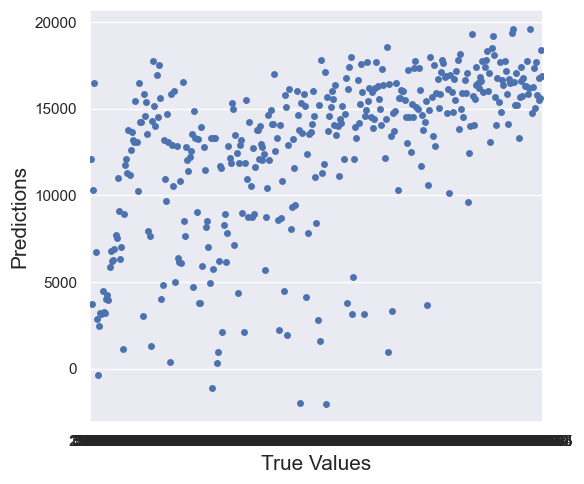

In [175]:
plt.figure(figsize=(6,5))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred.round(2))
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

Best n_neighbors for KNN Regressor

In [176]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8570.627779682969
RMSE value for k=  2 is: 7745.285040987605
RMSE value for k=  3 is: 7238.8248872234035
RMSE value for k=  4 is: 7004.63189058925
RMSE value for k=  5 is: 7011.142609901717
RMSE value for k=  6 is: 6924.018329498023
RMSE value for k=  7 is: 6842.161358378461
RMSE value for k=  8 is: 6696.594673200271
RMSE value for k=  9 is: 6632.220202796488
RMSE value for k=  10 is: 6624.403479212984


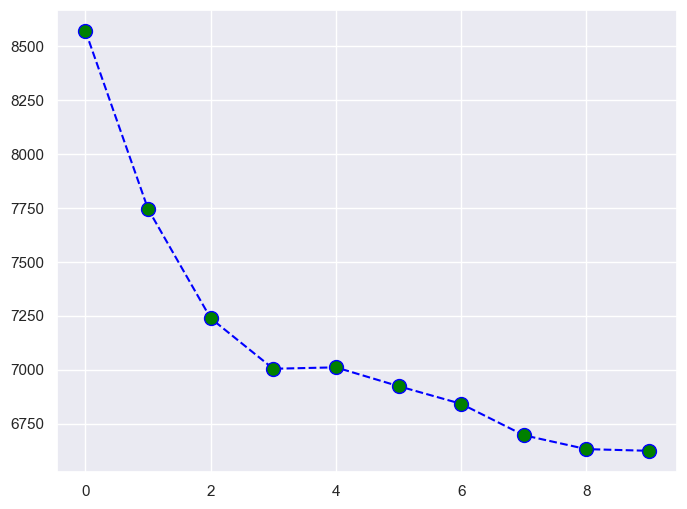

In [177]:
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k= 8, minimum RMSE value which is approx 6700, and shoots up on further increasing the k value. So, k=9 will give the best result in this case

In [178]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn import metrics

rf = RandomForestRegressor(n_estimators=250, max_depth=6)
svr = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='friedman_mse')  # Change the criterion to a valid option
adb = AdaBoostRegressor(learning_rate=0.1)
gradb = GradientBoostingRegressor(max_depth=6, learning_rate=0.1)
knn = KNeighborsRegressor(n_neighbors=4, algorithm='kd_tree')
ls = Lasso(alpha=1e-2, max_iter=100000)
rd = Ridge(alpha=1e-2)
xgb = XGBRegressor()

In [179]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn import metrics

rf = RandomForestRegressor(n_estimators=250, max_depth=6)
svr = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='friedman_mse')  # Change the criterion to a valid option
adb = AdaBoostRegressor(learning_rate=0.1)
gradb = GradientBoostingRegressor(max_depth=6, learning_rate=0.1)
knn = KNeighborsRegressor(n_neighbors=4, algorithm='kd_tree')
ls = Lasso(alpha=1e-2, max_iter=100000)
rd = Ridge(alpha=1e-2)
xgb = XGBRegressor()

models = [rf, ls, rd, svr, dtc, adb, gradb, knn, xgb]

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    print('\n')
    print('\033[1m' + ' Error of', model, ':' + '\033[0m')
    print('Mean absolute error:', metrics.mean_absolute_error(Y_test, y_pred))
    print('Mean squared error:', metrics.mean_squared_error(Y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
    print('\n')
    print('\033[1m' + ' R2 Score :' + '\033[0m')
    print(metrics.r2_score(Y_test, y_pred))
    print('=============================================')



 Error of RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error: 5100.855778637603
Mean squared error: 41470179.29729056
Root Mean Squared Error: 6439.73441201503


 R2 Score :
0.38595231923240925


 Error of Lasso(alpha=0.01, max_iter=100000) :
Mean absolute error: 5419.805207114545
Mean squared error: 47910054.21131037
Root Mean Squared Error: 6921.708908305114


 R2 Score :
0.2905972876797579


 Error of Ridge(alpha=0.01) :
Mean absolute error: 5419.8059130969405
Mean squared error: 47910044.083584875
Root Mean Squared Error: 6921.70817671367


 R2 Score :
0.2905974376406807


 Error of SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error: 6439.697406045694
Mean squared error: 64110088.33732786
Root Mean Squared Error: 8006.877564776913


 R2 Score :
0.050723876182673155


 Error of DecisionTreeRegressor(criterion='friedman_mse') :
Mean absolute error: 6852.878484544973
Mean squared error: 73374344.24700968
Root Mean Squared Error: 8565.88257256

Hyper Parameter Tuning

In [180]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import Lasso

parameters = {
    'alpha': np.array([1, 0.5, 0.1, 0.01, 0.001, 0.0001]),
    'fit_intercept': [True, False],
    'max_iter': [250, 500, 1000, 1500],
    'random_state': np.arange(100),
    'selection': ["cyclic", "random"]
}

GCV = GridSearchCV(Lasso(), parameters, cv=5, n_jobs=-1, verbose=3)
GCV.fit(X_train, Y_train)

Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [181]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 250,
 'random_state': 47,
 'selection': 'random'}

Final Model

In [182]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Final_mod = Lasso(alpha=0.5, fit_intercept=True, max_iter=250, random_state=32, selection='random')
Final_mod.fit(X_train, Y_train)
y_pred = Final_mod.predict(X_test)

print('\n')
print('\033[1m' + ' Error in Final Model :' + '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test, y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\n')
print('\033[1m' + ' R2 Score of Final Model :' + '\033[0m')
print(r2_score(Y_test, y_pred))
print('\n')



 Error in Final Model :
Mean absolute error : 5419.828060412136
Mean squared error : 47910070.12541943
Root Mean Squared Error: 6921.710057884498


 R2 Score of Final Model :
0.29059705204003017




 True Values Vs Predicted Value plot :


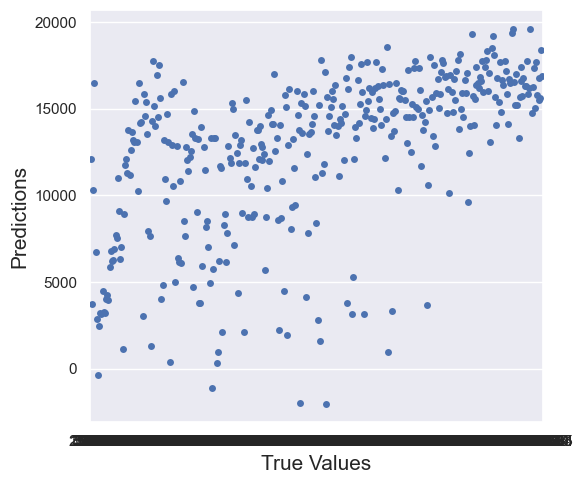

In [183]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import joblib

# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the Lasso model
lasso_model = Lasso(alpha=0.5, fit_intercept=True, max_iter=250, random_state=32, selection='random')
lasso_model.fit(X_train_scaled, Y_train)

# Save the model
joblib.dump(lasso_model, 'IMDB Gross_Collection_Prediction.AS')

['IMDB Gross_Collection_Prediction.AS']

# Target Variable: Votes

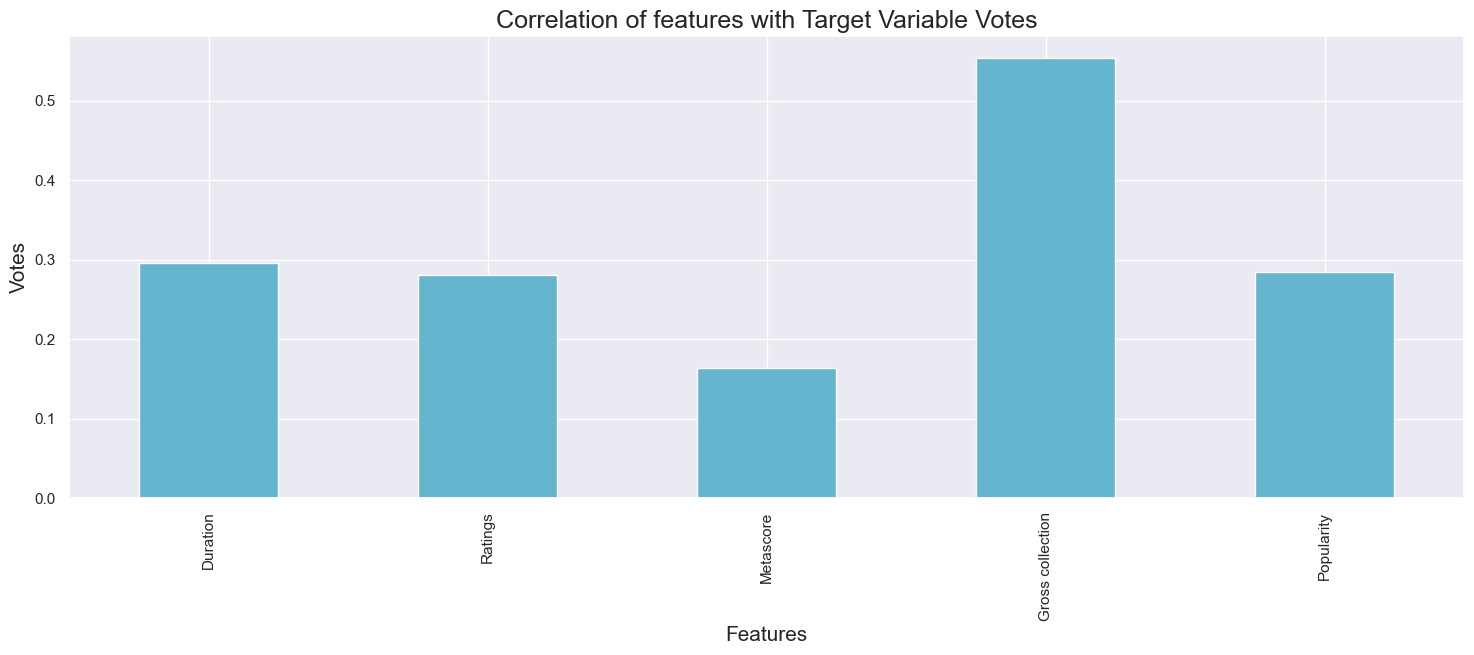

In [186]:
plt.figure(figsize = (18,6))
df1.corr()['Votes'].drop(['Votes']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Votes',fontsize=15)
plt.title('Correlation of features with Target Variable Votes',fontsize = 18)
plt.show()

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF          Features
0  183.793083          Duration
1  810.067488           Ratings
2   27.206086         Metascore
3  187.930106             Votes
4    3.355055  Gross collection
5  724.438058        Popularity

In [188]:
# Standard Scaling
X=df1.drop(columns =['Votes'])
Y=df1['Votes']

In [189]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

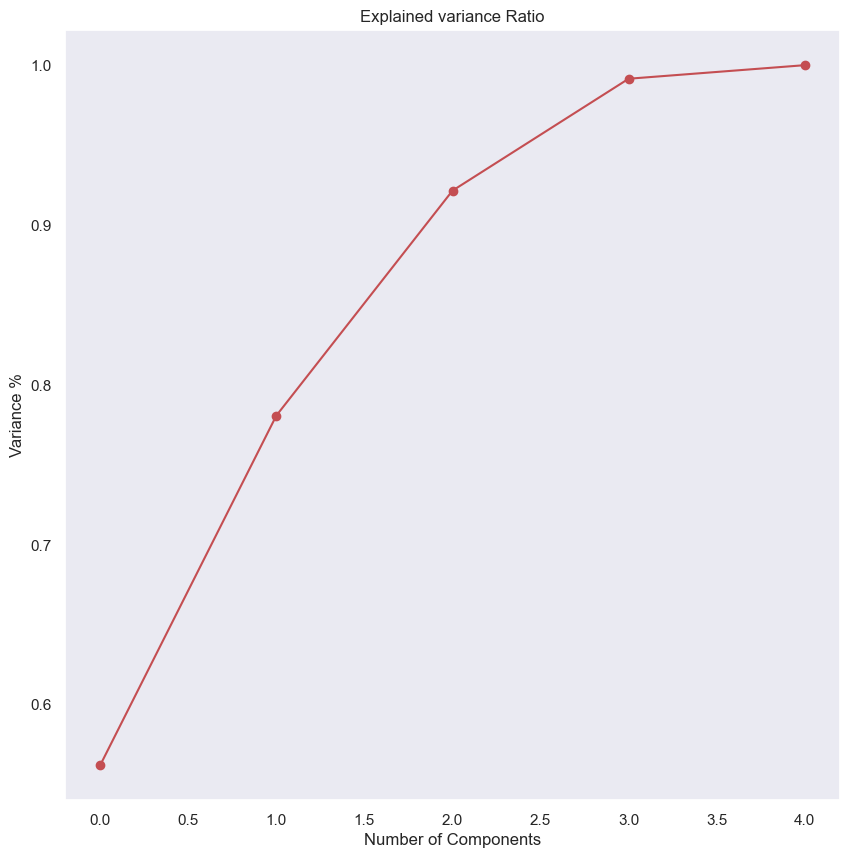

In [190]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
# Let us plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [191]:
pca_new = PCA(n_components=3)
x_new = pca_new.fit_transform(X_scale)

In [192]:
principle_x=pd.DataFrame(x_new,columns=np.arange(3))

In [193]:
# Let us Check Multicollinearity after applying PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(principle_x.values,i) for i in range(principle_x.shape[1])]
vif['Features']= principle_x.columns
vif

VIF  Features
0  1.0         0
1  1.0         1
2  1.0         2

Machine Learning Model Building for Voter as target variable

In [194]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1089, 3)
Training target vector size: (1089,)
Test feature matrix size: (467, 3)
Test target vector size: (467,)


In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=i, test_size=.25)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.43982514103299775 on Random_state 139


Linear Regression

In [196]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=217, test_size=.25)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Votes:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Votes:'+'\033[0m\n',Y_test)

Predicted Votes:
 [0.71428559 0.71428564 0.71428547 0.71428559 0.71428556 0.71428568
 0.71428565 0.71428561 0.71428564 0.71428575 0.71428552 0.71428557
 0.71428556 0.71428554 0.71428557 0.71428559 0.71428576 0.71428555
 0.71428564 0.71428571 0.71428562 0.71428557 0.71428567 0.71428565
 0.71428562 0.71428568 0.71428561 0.71428556 0.71428555 0.71428571
 0.71428553 0.71428557 0.71428567 0.71428567 0.71428554 0.71428552
 0.7142856  0.7142857  0.71428554 0.71428562 0.71428552 0.71428565
 0.71428551 0.71428564 0.71428562 0.71428549 0.71428566 0.71428565
 0.71428565 0.71428547 0.71428564 0.71428559 0.71428557 0.71428565
 0.71428552 0.7142855  0.7142856  0.71428553 0.71428555 0.71428551
 0.71428549 0.71428557 0.71428556 0.71428557 0.71428564 0.71428559
 0.71428554 0.71428553 0.7142855  0.71428554 0.7142856  0.71428564
 0.71428562 0.71428554 0.71428553 0.71428562 0.71428556 0.71428552
 0.71428561 0.7142855  0.7142855  0.71428554 0.71428557 0.71428557
 0.71428555 0.71428553 0.7142857  0.71428548

In [197]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 7.252817151829358e-08
Mean squared error : 9.402856011548046e-15
Root Mean Squared Error: 9.696832478468444e-08


 R2 Score :
0.3359995978127158


 True Values Vs Predicted Value plot :


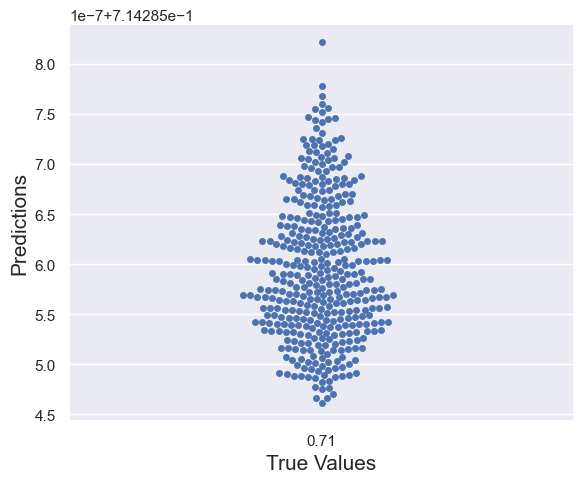

In [199]:
plt.figure(figsize=(6,5))
y_pred=lin_reg.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [200]:
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.393597280175361e-07
RMSE value for k=  2 is: 1.1833925648563753e-07
RMSE value for k=  3 is: 1.1046402649256208e-07
RMSE value for k=  4 is: 1.0773505589554168e-07
RMSE value for k=  5 is: 1.0628530559121682e-07
RMSE value for k=  6 is: 1.03586236214932e-07
RMSE value for k=  7 is: 1.0313823292535848e-07
RMSE value for k=  8 is: 1.0341266138509073e-07
RMSE value for k=  9 is: 1.0335532537063683e-07
RMSE value for k=  10 is: 1.0305723410853058e-07


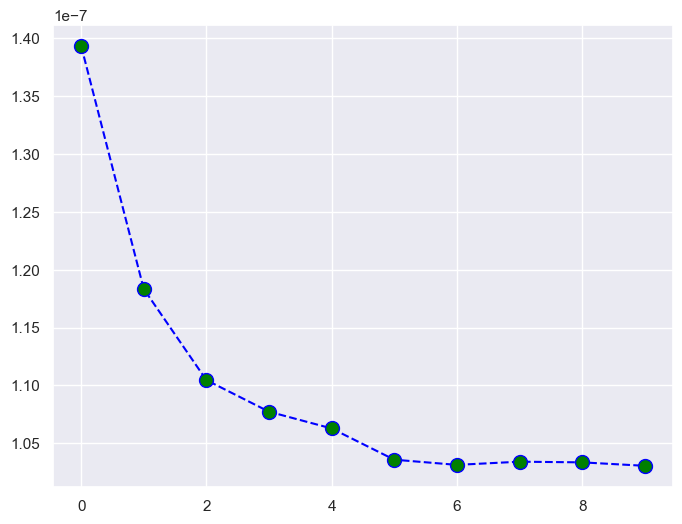

In [201]:
# Let us plot the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(10), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

At k= 3, minimum RMSE value which is approx 1.07, and shoots up on further increasing the k value. So, k=4 will give the best result in this case

In [202]:
rf = RandomForestRegressor(n_estimators=250, max_depth=6)
svr = SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
dtc = DecisionTreeRegressor(criterion='friedman_mse')  # Change the criterion to a valid option
adb = AdaBoostRegressor(learning_rate=0.1)
gradb = GradientBoostingRegressor(max_depth=6, learning_rate=0.1)
knn = KNeighborsRegressor(n_neighbors=4, algorithm='kd_tree')
ls = Lasso(alpha=1e-2, max_iter=100000)
rd = Ridge(alpha=1e-2)
xgb = XGBRegressor()

models = [rf, ls, rd, svr, dtc, adb, gradb, knn, xgb]

for model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    print('\n')
    print('\033[1m' + ' Error of', model, ':' + '\033[0m')
    print('Mean absolute error:', metrics.mean_absolute_error(Y_test, y_pred))
    print('Mean squared error:', metrics.mean_squared_error(Y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
    print('\n')
    print('\033[1m' + ' R2 Score :' + '\033[0m')
    print(metrics.r2_score(Y_test, y_pred))
    print('=====================================================')



 Error of RandomForestRegressor(max_depth=6, n_estimators=250) :
Mean absolute error: 6.99850205571219e-08
Mean squared error: 9.834710504338421e-15
Root Mean Squared Error: 9.917010892571622e-08


 R2 Score :
0.30550337873342515


 Error of Lasso(alpha=0.01, max_iter=100000) :
Mean absolute error: 9.547938510403421e-08
Mean squared error: 1.4163193274630944e-14
Root Mean Squared Error: 1.1900921508282854e-07


 R2 Score :
-0.00016059153317726782


 Error of Ridge(alpha=0.01) :
Mean absolute error: 7.252815675232735e-08
Mean squared error: 9.402856318641244e-15
Root Mean Squared Error: 9.696832636815614e-08


 R2 Score :
0.3359995761267508


 Error of SVR(epsilon=0.2, gamma='auto', kernel='poly') :
Mean absolute error: 1.6469202880088582e-07
Mean squared error: 3.191169999479924e-14
Root Mean Squared Error: 1.7863846168952317e-07


 R2 Score :
-1.2535048505478623


 Error of DecisionTreeRegressor(criterion='friedman_mse') :
Mean absolute error: 8.951021463421274e-08
Mean squared erro

Hyper Parameter Tuning : GridSearchCV

In [203]:
parameters = {
    'alpha': np.array([1, 0.5, 0.1, 0.01, 0.001, 0.0001]),
    'fit_intercept': [True, False],
    'max_iter': [250, 500, 1000, 1500],
    'random_state': np.arange(100),
    'selection': ["cyclic", "random"]
}

GCV = GridSearchCV(Lasso(), parameters, cv=5, n_jobs=-1, verbose=3)
GCV.fit(X_train, Y_train)

Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.e+00, 5.e-01, 1.e-01, 1.e-02, 1.e-03, 1.e-04]),
                         'fit_intercept': [True, False],
                         'max_iter': [250, 500, 1000, 1500],
                         'random_state': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'selection': ['cyclic', 'random']},
             verbose=3)

In [204]:
GCV.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'max_iter': 250,
 'random_state': 0,
 'selection': 'cyclic'}

Final Model

In [205]:
Final_mod = Lasso(alpha=0.5, fit_intercept=True, max_iter=250, random_state=32, selection='random')
Final_mod.fit(X_train, Y_train)
y_pred = Final_mod.predict(X_test)

print('\n')
print('\033[1m' + ' Error in Final Model :' + '\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test, y_pred))
print('Mean squared error :', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))
print('\n')
print('\033[1m' + ' R2 Score of Final Model :' + '\033[0m')
print(r2_score(Y_test, y_pred))
print('\n')



 Error in Final Model :
Mean absolute error : 9.547938510403421e-08
Mean squared error : 1.4163193274630944e-14
Root Mean Squared Error: 1.1900921508282854e-07


 R2 Score of Final Model :
-0.00016059153317726782




 True Values Vs Predicted Value plot :


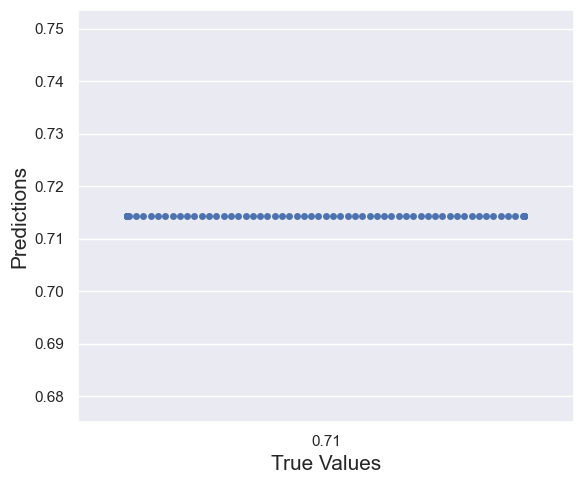

In [207]:
plt.figure(figsize=(6,5))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

In [209]:
# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the Lasso model
lasso_model = Lasso(alpha=0.5, fit_intercept=True, max_iter=250, random_state=32, selection='random')
lasso_model.fit(X_train_scaled, Y_train)

# Save the model
joblib.dump(lasso_model, 'IMDB_Votes_Prediction.AS')# Normalize the input data

['IMDB_Votes_Prediction.AS']